# Competição DSA 01/2019 


## Análise exploratória

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Pegando .csv 
df = pd.read_csv('C:/DSA/Competicao01_DSA/dataset_treino.csv',sep=',', encoding='ISO-8859-1')
dfTest = pd.read_csv('C:/DSA/Competicao01_DSA/dataset_teste.csv',sep=',', encoding='ISO-8859-1')
df.head(10)

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [3]:
#Shape Treino e Teste
print("Shape df Treino: ", df.shape)
print ("Shape df Teste: ", dfTest.shape)

Shape df Treino:  (600, 10)
Shape df Teste:  (168, 9)


In [4]:
#Data Types
print ("==== Treino ==== \n", df.dtypes)
print ("\n ==== Teste ==== \n", dfTest.dtypes)

==== Treino ==== 
 id                     int64
num_gestacoes          int64
glicose                int64
pressao_sanguinea      int64
grossura_pele          int64
insulina               int64
bmi                  float64
indice_historico     float64
idade                  int64
classe                 int64
dtype: object

 ==== Teste ==== 
 id                     int64
num_gestacoes          int64
glicose                int64
pressao_sanguinea      int64
grossura_pele          int64
insulina               int64
bmi                  float64
indice_historico     float64
idade                  int64
dtype: object


In [5]:
df.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dfTest.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,84.500000,3.964286,124.148810,70.619048,20.827381,104.565476,32.304167,0.438583,33.125000
std,48.641546,3.441370,30.106525,19.321673,15.577120,353.528165,7.433299,0.308102,11.565584
min,1.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000
25%,42.750000,1.000000,102.000000,62.000000,0.000000,0.000000,27.675000,0.222750,23.750000
50%,84.500000,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.341500,28.000000
75%,126.250000,6.000000,142.500000,80.500000,32.250000,136.250000,36.650000,0.588000,42.000000
max,168.000000,13.000000,212.000000,114.000000,49.000000,4444.000000,57.300000,1.698000,70.000000


In [7]:
#Colunas Com valores nulos
print("==== Treino ====\n", df.isnull().any())
print("\n ==== Teste ==== \n", dfTest.isnull().any())

==== Treino ====
 id                   False
num_gestacoes        False
glicose              False
pressao_sanguinea    False
grossura_pele        False
insulina             False
bmi                  False
indice_historico     False
idade                False
classe               False
dtype: bool

 ==== Teste ==== 
 id                   False
num_gestacoes        False
glicose              False
pressao_sanguinea    False
grossura_pele        False
insulina             False
bmi                  False
indice_historico     False
idade                False
dtype: bool


In [8]:
#Tendo uma noção da distribuição das classes
df['classe'].value_counts()

0    392
1    208
Name: classe, dtype: int64

In [9]:
c0, c1 = df['classe'].value_counts()
ct = c0 + c1

print("Classe 0:", (c0/ct)*100)
print("Classe 1: ", (c1/ct)*100)

Classe 0: 65.33333333333333
Classe 1:  34.66666666666667


In [10]:
#Bibliotecas de visualização
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

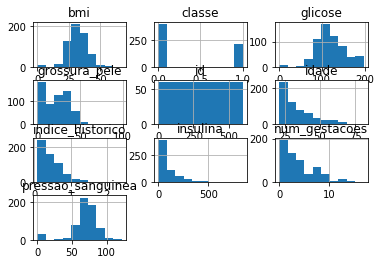

In [12]:
# Histogram
df.hist()
plt.show()

In [16]:
#Vendo se há alguma correlação entre as variáveis
correlacoes = df.corr()
correlacoes.T

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
id,1.000000,-0.081928,-0.033261,-0.022520,0.028834,-0.000328,-0.013234,-0.002386,0.008577,-0.091694
num_gestacoes,-0.081928,1.000000,0.139924,0.118589,-0.080628,-0.055261,0.034970,-0.051889,0.532926,0.207922
glicose,-0.033261,0.139924,1.000000,0.143653,0.054515,0.339553,0.216336,0.144771,0.274294,0.449891
pressao_sanguinea,-0.022520,0.118589,0.143653,1.000000,0.197539,0.094150,0.271557,0.008882,0.226710,0.062860
grossura_pele,0.028834,-0.080628,0.054515,0.197539,1.000000,0.428922,0.377854,0.176640,-0.121348,0.075745
insulina,-0.000328,-0.055261,0.339553,0.094150,0.428922,1.000000,0.183903,0.218154,-0.011876,0.145390
bmi,-0.013234,0.034970,0.216336,0.271557,0.377854,0.183903,1.000000,0.127945,0.047187,0.316773
indice_historico,-0.002386,-0.051889,0.144771,0.008882,0.176640,0.218154,0.127945,1.000000,0.033781,0.181741
idade,0.008577,0.532926,0.274294,0.226710,-0.121348,-0.011876,0.047187,0.033781,1.000000,0.210824
classe,-0.091694,0.207922,0.449891,0.062860,0.075745,0.145390,0.316773,0.181741,0.210824,1.000000


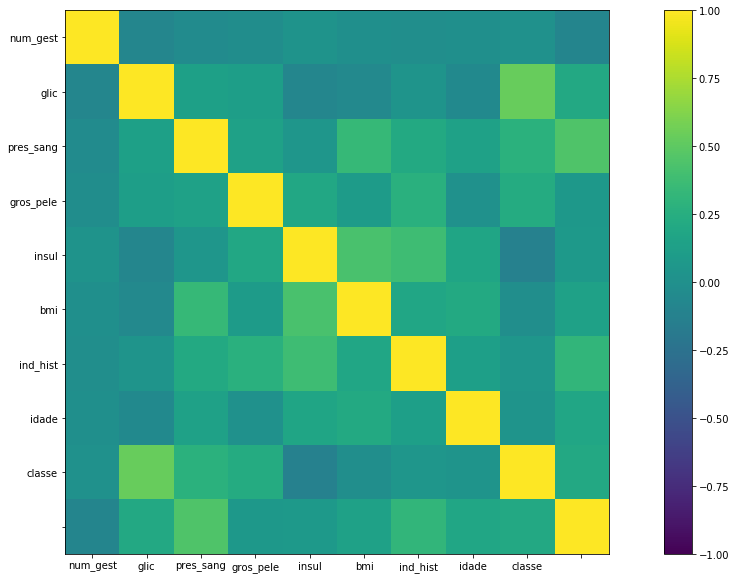

In [17]:
#Visualizando as correlações 
cols = ['num_gest', 'glic', 'pres_sang','gros_pele', 'insul', 'bmi', 'ind_hist', 'idade','classe']
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.imshow(correlacoes, interpolation='nearest', vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 10, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)
plt.show()

In [18]:
print("====== Treino =======\n", df.columns)
print("\n====== Teste =======\n", dfTest.columns)

====== Treino =======
 Index(['id', 'num_gestacoes', 'glicose', 'pressao_sanguinea', 'grossura_pele',
       'insulina', 'bmi', 'indice_historico', 'idade', 'classe'],
      dtype='object')

====== Teste =======
 Index(['id', 'num_gestacoes', 'glicose', 'pressao_sanguinea', 'grossura_pele',
       'insulina', 'bmi', 'indice_historico', 'idade'],
      dtype='object')


In [19]:
#Colocando os Dados na mesma escala
from sklearn.preprocessing import MinMaxScaler

#colsDFSel = ['num_gestacoes', 'glicose', 'pressao_sanguinea','insulina', 'bmi', 'indice_historico', 'grossura_pele', 'idade','classe']
#colsDFSel = ['num_gestacoes', 'glicose', 'insulina', 'bmi', 'indice_historico', 'grossura_pele', 'idade', 'classe']
colsDFSel = ['num_gestacoes', 'glicose', 'insulina', 'bmi', 'indice_historico', 'idade', 'classe']

#colsDFTesteSel = ['num_gestacoes', 'glicose', 'pressao_sanguinea','insulina', 'bmi', 'indice_historico', 'grossura_pele', 'idade']
#colsDFTesteSel = ['num_gestacoes', 'glicose', 'insulina', 'bmi', 'indice_historico', 'grossura_pele','idade']
colsDFTesteSel = ['num_gestacoes', 'glicose', 'insulina', 'bmi', 'indice_historico','idade']

colTrain = colsDFSel
dfMLTrain = df[colTrain]
arrayTrain = dfMLTrain.values

colTest =  colsDFTesteSel
dfMLTest = dfTest[colTest]
arrayTest = dfMLTest.values

#Splitting array in input and output
XTrain = arrayTrain[:,0:6]
YTrain = arrayTrain[:,6]
XTest = arrayTest[:,0:6]

#Creating new scale
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledXTrain = scaler.fit_transform(XTrain)
rescaledXTest = scaler.fit_transform(XTest)


# Data transformed
print(rescaledXTrain[0:5,:])

[[0.35294118 0.74747475 0.         0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42929293 0.         0.39642325 0.11656704 0.16666667]
 [0.47058824 0.92424242 0.         0.34724292 0.25362938 0.18333333]
 [0.05882353 0.44949495 0.11111111 0.41877794 0.03800171 0.        ]
 [0.         0.69191919 0.19858156 0.64232489 0.94363792 0.2       ]]


In [20]:
#Fazendo Feature Selection usando chi2 test

# Import modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Selecting the 5 better features that can be used in prediction model
test = SelectKBest(score_func = chi2, k = 4) 
#fit = test.fit(XTrain, YTrain)
fit = test.fit(rescaledXTrain, YTrain)

print("====== Features =======\n", colsDFSel)

# Summarizing score
print(fit.scores_)
#features = fit.transform(XTrain)
print("========================\n")
features = fit.transform(rescaledXTrain)

# Summarizing selected Features
print(features[0:5,:])

====== Features =======
 ['num_gestacoes', 'glicose', 'insulina', 'bmi', 'indice_historico', 'idade', 'classe']
[4.5072754  5.4361706  2.55377499 1.80120024 2.3843116  5.0510385 ]

[[0.35294118 0.74747475 0.         0.48333333]
 [0.05882353 0.42929293 0.         0.16666667]
 [0.47058824 0.92424242 0.         0.18333333]
 [0.05882353 0.44949495 0.11111111 0.        ]
 [0.         0.69191919 0.19858156 0.2       ]]


## Machine Learning

C:\Users\thiago.mribeiro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


LR: 0.763333 (0.059067)
LDA: 0.771667 (0.064140)
NB: 0.756667 (0.048990)
KNN: 0.725000 (0.052836)
DTC: 0.665000 (0.063004)
SVM: 0.760000 (0.060645)
ETC: 0.728333 (0.062827)
ABC: 0.728333 (0.067515)
BGC: 0.725000 (0.073125)
RFC: 0.748333 (0.062115)
GPC: 0.770000 (0.062716)
MLPC: 0.778333 (0.069940)


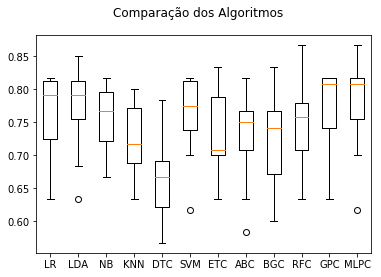

In [21]:
#Selecionando melhor modelo
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#Definindo numero de folds
num_folds = 10
seed = 7


#Preparando modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('ETC', ExtraTreesClassifier()))
modelos.append(('ABC', AdaBoostClassifier()))
modelos.append(('BGC', BaggingClassifier()))
modelos.append(('RFC', RandomForestClassifier()))
modelos.append(('GPC', GaussianProcessClassifier())) 
modelos.append(('MLPC', MLPClassifier()))



#Avaliação dos modelos
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)
    cv_results = model_selection.cross_val_score(modelo, rescaledXTrain, YTrain, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot pra comparar algoritmos
fig = plt.figure()
fig.suptitle('Comparação dos Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [22]:
#Regressão Logística(LR)
modelLR = LogisticRegression()

param_grid_lr = { 
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter':[10, 20, 50, 100],
    'multi_class':['ovr', 'multinomial'],
    'verbose':[0, 1],
    'warm_start': [True, False]
}
CV_lr = GridSearchCV(estimator=modelLR, param_grid=param_grid_lr, cv=num_folds)
CV_lr.fit(rescaledXTrain, YTrain)
print (CV_lr.best_params_)
print (round(CV_lr.score(rescaledXTrain, YTrain) * 100, 2))

# Predictions
YPredLR = CV_lr.predict(rescaledXTest)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 20 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 20 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

convergence after 17 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 14 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 20 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 17 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 19 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
max_iter reached after 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 19 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

convergence after 20 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 22 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

convergence after 16 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

convergence after 31 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 36 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 32 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 27 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

convergence after 30 epochs took 0 seconds
convergence after 35 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 18 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 18 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 17 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

convergence after 26 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 25 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 17 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 14 epochs took 0 seconds
convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

convergence after 30 epochs took 0 seconds
convergence after 32 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 35 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 31 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

convergence after 33 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 37 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
{'max_iter'

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

In [23]:
#LDA
modelLDA = LinearDiscriminantAnalysis()

param_grid_lda = { 
    'solver': ['svd','lsqr','eigen'],
    'store_covariance':[False, True],
    'tol':[0.0001, 0.0005, 0.0010]
}
CV_lda = GridSearchCV(estimator=modelLDA, param_grid=param_grid_lda, cv=num_folds)
CV_lda.fit(rescaledXTrain, YTrain)
print (CV_lda.best_params_)
print (round(CV_lda.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredLDA = CV_lda.predict(rescaledXTest)

{'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
77.67


In [27]:
#GaussianNB
modelGNB = GaussianNB()

param_grid_gnb = { 
    'priors': [None]
}
CV_gnb = GridSearchCV(estimator=modelGNB, param_grid=param_grid_gnb, cv=num_folds)
CV_gnb.fit(rescaledXTrain, YTrain)
print (CV_gnb.best_params_)
print (round(CV_gnb.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredGNB = CV_gnb.predict(rescaledXTest)

{'priors': None}
76.17


In [28]:
#SVM
modelSVM = SVC()

param_grid_svm = { 
    'shrinking': [True, False],
    'probability': [True, False],
    'verbose':[True, False],
    'decision_function_shape': ['ovr', 'ovo'],
    'max_iter':[1, 3, 5, 10]
}
CV_svm = GridSearchCV(estimator=modelSVM, param_grid=param_grid_svm, cv=num_folds)
CV_svm.fit(rescaledXTrain, YTrain)
print (CV_svm.best_params_)
print (round(CV_svm.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredSVM = CV_svm.predict(rescaledXTest)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [29]:
#KNN
modelKNN = KNeighborsClassifier()

modelKNN.fit(rescaledXTrain, YTrain)

param_grid_knn = { 
    'n_neighbors': [3, 4, 5, 6, 7],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform','distance'],
    'leaf_size':[1, 2, 3],
    'p': [2, 1]  
}
CV_knn = GridSearchCV(estimator=modelKNN, param_grid=param_grid_knn, cv=num_folds)
CV_knn.fit(rescaledXTrain, YTrain)
print (CV_knn.best_params_)
print (round(CV_knn.score(rescaledXTrain, YTrain) * 100, 2))



# Predictions
YPredKNN = CV_knn.predict(rescaledXTest)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
83.5


In [30]:
#GPC
modelGPC = GaussianProcessClassifier()

param_grid_gpc = { 
    'max_iter_predict': [5, 10, 15, 20, 50, 100],
    'warm_start': [False, True],
    'multi_class': ['one_vs_rest', 'one_vs_one']
}
CV_gpc = GridSearchCV(estimator=modelGPC, param_grid=param_grid_gpc, cv=num_folds)
CV_gpc.fit(rescaledXTrain, YTrain)
print (CV_gpc.best_params_)
print (round(CV_gpc.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredGPC = CV_gpc.predict(rescaledXTest)

{'max_iter_predict': 5, 'multi_class': 'one_vs_rest', 'warm_start': False}
77.5


In [31]:
#MLPC
modelMLPC = MLPClassifier(hidden_layer_sizes=(80, ))

param_grid_mlp = { 
    'max_iter': [50, 80],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'early_stopping':[True, False],
    'warm_start': [True, False],
    'verbose': [True, False]
    
}
CV_mlp = GridSearchCV(estimator=modelMLPC, param_grid=param_grid_mlp, cv=num_folds)
CV_mlp.fit(rescaledXTrain, YTrain)
print (CV_mlp.best_params_)
print (round(CV_mlp.score(rescaledXTrain, YTrain) * 100, 2))

# Predictions
YPredGPC = CV_mlp.predict(rescaledXTest)

Iteration 1, loss = 0.70442929
Validation score: 0.388889
Iteration 2, loss = 0.70248855
Validation score: 0.388889
Iteration 3, loss = 0.69936224
Validation score: 0.407407
Iteration 4, loss = 0.69578253
Validation score: 0.481481
Iteration 5, loss = 0.69198973
Validation score: 0.537037
Iteration 6, loss = 0.68831587
Validation score: 0.648148
Iteration 7, loss = 0.68453547
Validation score: 0.648148
Iteration 8, loss = 0.68112178
Validation score: 0.629630
Iteration 9, loss = 0.67788511
Validation score: 0.629630
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.65680341
Validation score: 0.611111
Iteration 2, loss = 0.65590420
Validation score: 0.592593
Iteration 3, loss = 0.65454154
Validation score: 0.574074
Iteration 4, loss = 0.65294046
Validation score: 0.574074
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.63409239
Validation score: 0.537037


Iteration 9, loss = 0.67005570
Validation score: 0.781818
Iteration 10, loss = 0.66738187
Validation score: 0.745455
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.68925788
Validation score: 0.690909
Iteration 2, loss = 0.68903588
Validation score: 0.690909
Iteration 3, loss = 0.68872471
Validation score: 0.690909
Iteration 4, loss = 0.68829321
Validation score: 0.690909
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.65093337
Validation score: 0.629630
Iteration 2, loss = 0.64422850
Validation score: 0.629630
Iteration 3, loss = 0.63921405
Validation score: 0.629630
Iteration 4, loss = 0.63671813
Validation score: 0.629630
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.66614870
Validation score: 0.648148
Iteration 2, loss = 0.65553106
Validation score: 0.666667
Iteration 3, loss = 0

Iteration 1, loss = 0.69279533
Validation score: 0.666667
Iteration 2, loss = 0.69217763
Validation score: 0.685185
Iteration 3, loss = 0.69119290
Validation score: 0.685185
Iteration 4, loss = 0.68999565
Validation score: 0.740741
Iteration 5, loss = 0.68871622
Validation score: 0.759259
Iteration 6, loss = 0.68731080
Validation score: 0.759259
Iteration 7, loss = 0.68585279
Validation score: 0.759259
Iteration 8, loss = 0.68458589
Validation score: 0.759259
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.68199668
Validation score: 0.666667
Iteration 2, loss = 0.68101433
Validation score: 0.666667
Iteration 3, loss = 0.67943058
Validation score: 0.648148
Iteration 4, loss = 0.67772065
Validation score: 0.722222
Iteration 5, loss = 0.67557333
Validation score: 0.722222
Iteration 6, loss = 0.67341379
Validation score: 0.722222
Iteration 7, loss = 0.67155089
Validation score: 0.722222
Validation score did not improve mor

Iteration 4, loss = 0.70017503
Validation score: 0.527273
Iteration 5, loss = 0.69622036
Validation score: 0.563636
Iteration 6, loss = 0.69197481
Validation score: 0.509091
Iteration 7, loss = 0.68780142
Validation score: 0.563636
Iteration 8, loss = 0.68393981
Validation score: 0.600000
Iteration 9, loss = 0.67999286
Validation score: 0.581818
Iteration 10, loss = 0.67638719
Validation score: 0.618182
Iteration 11, loss = 0.67292496
Validation score: 0.600000
Iteration 12, loss = 0.67009568
Validation score: 0.581818
Iteration 13, loss = 0.66723720
Validation score: 0.581818
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67807789
Validation score: 0.745455
Iteration 2, loss = 0.67733288
Validation score: 0.763636
Iteration 3, loss = 0.67608901
Validation score: 0.781818
Iteration 4, loss = 0.67467398
Validation score: 0.781818
Iteration 5, loss = 0.67315675
Validation score: 0.800000
Iteration 6, loss = 0.67161755
V

Iteration 1, loss = 0.67824084
Iteration 2, loss = 0.67753718
Iteration 3, loss = 0.67635974
Iteration 4, loss = 0.67509157
Iteration 5, loss = 0.67371087
Iteration 6, loss = 0.67233956
Iteration 7, loss = 0.67090463
Iteration 8, loss = 0.66948554
Iteration 9, loss = 0.66816316
Iteration 10, loss = 0.66692300
Iteration 11, loss = 0.66573578
Iteration 12, loss = 0.66474140
Iteration 13, loss = 0.66396911
Iteration 14, loss = 0.66298695
Iteration 15, loss = 0.66224039
Iteration 16, loss = 0.66147078
Iteration 17, loss = 0.66078828
Iteration 18, loss = 0.66021478
Iteration 19, loss = 0.65958815
Iteration 20, loss = 0.65908714
Iteration 21, loss = 0.65867205
Iteration 22, loss = 0.65814861
Iteration 23, loss = 0.65771626
Iteration 24, loss = 0.65732582
Iteration 25, loss = 0.65697621
Iteration 26, loss = 0.65661003
Iteration 27, loss = 0.65624562
Iteration 28, loss = 0.65590161
Iteration 29, loss = 0.65556215
Iteration 30, loss = 0.65529013
Iteration 31, loss = 0.65498655
Iteration 32, los

Iteration 40, loss = 0.64647989
Iteration 41, loss = 0.64611155
Iteration 42, loss = 0.64575979
Iteration 43, loss = 0.64539918
Iteration 44, loss = 0.64511526
Iteration 45, loss = 0.64477743
Iteration 46, loss = 0.64447139
Iteration 47, loss = 0.64419907
Iteration 48, loss = 0.64392648
Iteration 49, loss = 0.64366333
Iteration 50, loss = 0.64342159
Iteration 1, loss = 0.69470161
Iteration 2, loss = 0.69338431
Iteration 3, loss = 0.69152715
Iteration 4, loss = 0.68919186
Iteration 5, loss = 0.68672095
Iteration 6, loss = 0.68418191
Iteration 7, loss = 0.68162001
Iteration 8, loss = 0.67940782
Iteration 9, loss = 0.67706404
Iteration 10, loss = 0.67486967
Iteration 11, loss = 0.67297365
Iteration 12, loss = 0.67101716
Iteration 13, loss = 0.66976190
Iteration 14, loss = 0.66804673
Iteration 15, loss = 0.66696850
Iteration 16, loss = 0.66554200
Iteration 17, loss = 0.66447168
Iteration 18, loss = 0.66346381
Iteration 19, loss = 0.66247960
Iteration 20, loss = 0.66159166
Iteration 21, los

Iteration 44, loss = 0.65579957
Iteration 45, loss = 0.65553540
Iteration 46, loss = 0.65529007
Iteration 47, loss = 0.65502819
Iteration 48, loss = 0.65478423
Iteration 49, loss = 0.65453691
Iteration 50, loss = 0.65431958
Iteration 1, loss = 0.65235038
Iteration 2, loss = 0.65226418
Iteration 3, loss = 0.65215933
Iteration 4, loss = 0.65197726
Iteration 5, loss = 0.65180484
Iteration 6, loss = 0.65161262
Iteration 7, loss = 0.65142936
Iteration 8, loss = 0.65118696
Iteration 9, loss = 0.65098423
Iteration 10, loss = 0.65076398
Iteration 11, loss = 0.65054874
Iteration 12, loss = 0.65033801
Iteration 13, loss = 0.65011774
Iteration 14, loss = 0.64990835
Iteration 15, loss = 0.64969822
Iteration 16, loss = 0.64948047
Iteration 17, loss = 0.64927438
Iteration 18, loss = 0.64909252
Iteration 19, loss = 0.64885843
Iteration 20, loss = 0.64864778
Iteration 21, loss = 0.64847303
Iteration 22, loss = 0.64825578
Iteration 23, loss = 0.64803867
Iteration 24, loss = 0.64785523
Iteration 25, los

Iteration 6, loss = 0.66746528
Iteration 7, loss = 0.66570161
Iteration 8, loss = 0.66383002
Iteration 9, loss = 0.66166653
Iteration 10, loss = 0.65945132
Iteration 11, loss = 0.65694953
Iteration 12, loss = 0.65442325
Iteration 13, loss = 0.65199010
Iteration 14, loss = 0.64962510
Iteration 15, loss = 0.64745938
Iteration 16, loss = 0.64516067
Iteration 17, loss = 0.64293849
Iteration 18, loss = 0.64075239
Iteration 19, loss = 0.63854652
Iteration 20, loss = 0.63649293
Iteration 21, loss = 0.63419428
Iteration 22, loss = 0.63203477
Iteration 23, loss = 0.62987469
Iteration 24, loss = 0.62767768
Iteration 25, loss = 0.62560304
Iteration 26, loss = 0.62343780
Iteration 27, loss = 0.62126325
Iteration 28, loss = 0.61913189
Iteration 29, loss = 0.61705227
Iteration 30, loss = 0.61496138
Iteration 31, loss = 0.61291762
Iteration 32, loss = 0.61076851
Iteration 33, loss = 0.60865559
Iteration 34, loss = 0.60662875
Iteration 35, loss = 0.60447203
Iteration 36, loss = 0.60252640
Iteration 37

Iteration 30, loss = 0.62770865
Iteration 31, loss = 0.62614092
Iteration 32, loss = 0.62446654
Iteration 33, loss = 0.62297846
Iteration 34, loss = 0.62153183
Iteration 35, loss = 0.61985204
Iteration 36, loss = 0.61837132
Iteration 37, loss = 0.61685074
Iteration 38, loss = 0.61534515
Iteration 39, loss = 0.61392690
Iteration 40, loss = 0.61238693
Iteration 41, loss = 0.61104700
Iteration 42, loss = 0.60972967
Iteration 43, loss = 0.60813548
Iteration 44, loss = 0.60669785
Iteration 45, loss = 0.60531210
Iteration 46, loss = 0.60391277
Iteration 47, loss = 0.60259454
Iteration 48, loss = 0.60145492
Iteration 49, loss = 0.59988008
Iteration 50, loss = 0.59853914
Iteration 1, loss = 0.67234916
Iteration 2, loss = 0.66658941
Iteration 3, loss = 0.66232143
Iteration 4, loss = 0.65910345
Iteration 5, loss = 0.65567027
Iteration 6, loss = 0.65231359
Iteration 7, loss = 0.64881424
Iteration 8, loss = 0.64544792
Iteration 9, loss = 0.64208315
Iteration 10, loss = 0.63890543
Iteration 11, los

Iteration 43, loss = 0.57535716
Iteration 44, loss = 0.57393930
Iteration 45, loss = 0.57245250
Iteration 46, loss = 0.57124800
Iteration 47, loss = 0.56977065
Iteration 48, loss = 0.56819854
Iteration 49, loss = 0.56692894
Iteration 50, loss = 0.56572631
Iteration 1, loss = 0.71541360
Iteration 2, loss = 0.69979133
Iteration 3, loss = 0.68683189
Iteration 4, loss = 0.67797386
Iteration 5, loss = 0.67305617
Iteration 6, loss = 0.66980870
Iteration 7, loss = 0.66752533
Iteration 8, loss = 0.66577206
Iteration 9, loss = 0.66381552
Iteration 10, loss = 0.66172989
Iteration 11, loss = 0.65934995
Iteration 12, loss = 0.65685129
Iteration 13, loss = 0.65406647
Iteration 14, loss = 0.65194174
Iteration 15, loss = 0.64938369
Iteration 16, loss = 0.64692292
Iteration 17, loss = 0.64496920
Iteration 18, loss = 0.64282813
Iteration 19, loss = 0.64078302
Iteration 20, loss = 0.63875086
Iteration 21, loss = 0.63650009
Iteration 22, loss = 0.63450349
Iteration 23, loss = 0.63238015
Iteration 24, los

Iteration 43, loss = 0.64584376
Iteration 44, loss = 0.64565757
Iteration 45, loss = 0.64545726
Iteration 46, loss = 0.64525548
Iteration 47, loss = 0.64506716
Iteration 48, loss = 0.64485982
Iteration 49, loss = 0.64466226
Iteration 50, loss = 0.64446785
Iteration 51, loss = 0.64426516
Iteration 52, loss = 0.64408212
Iteration 53, loss = 0.64388157
Iteration 54, loss = 0.64368645
Iteration 55, loss = 0.64348966
Iteration 56, loss = 0.64330240
Iteration 57, loss = 0.64311012
Iteration 58, loss = 0.64292122
Iteration 59, loss = 0.64273612
Iteration 60, loss = 0.64253289
Iteration 61, loss = 0.64234068
Iteration 62, loss = 0.64214763
Iteration 63, loss = 0.64195497
Iteration 64, loss = 0.64179309
Iteration 65, loss = 0.64158132
Iteration 66, loss = 0.64138318
Iteration 67, loss = 0.64119273
Iteration 68, loss = 0.64100702
Iteration 69, loss = 0.64081348
Iteration 70, loss = 0.64064765
Iteration 71, loss = 0.64043831
Iteration 72, loss = 0.64025078
Iteration 73, loss = 0.64006820
Iteratio

Iteration 43, loss = 0.65658833
Iteration 44, loss = 0.65635073
Iteration 45, loss = 0.65611588
Iteration 46, loss = 0.65588529
Iteration 47, loss = 0.65563241
Iteration 48, loss = 0.65542339
Iteration 49, loss = 0.65517657
Iteration 50, loss = 0.65494954
Iteration 51, loss = 0.65473098
Iteration 52, loss = 0.65450663
Iteration 53, loss = 0.65427819
Iteration 54, loss = 0.65406022
Iteration 55, loss = 0.65384480
Iteration 56, loss = 0.65361556
Iteration 57, loss = 0.65340612
Iteration 58, loss = 0.65317801
Iteration 59, loss = 0.65296267
Iteration 60, loss = 0.65274563
Iteration 61, loss = 0.65253338
Iteration 62, loss = 0.65231665
Iteration 63, loss = 0.65210374
Iteration 64, loss = 0.65187968
Iteration 65, loss = 0.65166909
Iteration 66, loss = 0.65146202
Iteration 67, loss = 0.65125635
Iteration 68, loss = 0.65103447
Iteration 69, loss = 0.65083038
Iteration 70, loss = 0.65061099
Iteration 71, loss = 0.65040581
Iteration 72, loss = 0.65019220
Iteration 73, loss = 0.64999834
Iteratio

Iteration 49, loss = 0.64198669
Iteration 50, loss = 0.64179484
Iteration 51, loss = 0.64159446
Iteration 52, loss = 0.64141700
Iteration 53, loss = 0.64122040
Iteration 54, loss = 0.64102010
Iteration 55, loss = 0.64081904
Iteration 56, loss = 0.64063307
Iteration 57, loss = 0.64044597
Iteration 58, loss = 0.64026257
Iteration 59, loss = 0.64006482
Iteration 60, loss = 0.63989563
Iteration 61, loss = 0.63971317
Iteration 62, loss = 0.63951707
Iteration 63, loss = 0.63932849
Iteration 64, loss = 0.63916915
Iteration 65, loss = 0.63896581
Iteration 66, loss = 0.63878340
Iteration 67, loss = 0.63860809
Iteration 68, loss = 0.63841929
Iteration 69, loss = 0.63823935
Iteration 70, loss = 0.63806546
Iteration 71, loss = 0.63787644
Iteration 72, loss = 0.63769583
Iteration 73, loss = 0.63751936
Iteration 74, loss = 0.63733937
Iteration 75, loss = 0.63715578
Iteration 76, loss = 0.63698616
Iteration 77, loss = 0.63681026
Iteration 78, loss = 0.63662524
Iteration 79, loss = 0.63644695
Iteratio

Iteration 50, loss = 0.64306127
Iteration 51, loss = 0.64288207
Iteration 52, loss = 0.64271711
Iteration 53, loss = 0.64253150
Iteration 54, loss = 0.64236765
Iteration 55, loss = 0.64218214
Iteration 56, loss = 0.64201656
Iteration 57, loss = 0.64185365
Iteration 58, loss = 0.64168489
Iteration 59, loss = 0.64150031
Iteration 60, loss = 0.64133713
Iteration 61, loss = 0.64115922
Iteration 62, loss = 0.64099356
Iteration 63, loss = 0.64082456
Iteration 64, loss = 0.64066235
Iteration 65, loss = 0.64048524
Iteration 66, loss = 0.64031260
Iteration 67, loss = 0.64014250
Iteration 68, loss = 0.63998444
Iteration 69, loss = 0.63981134
Iteration 70, loss = 0.63965637
Iteration 71, loss = 0.63948540
Iteration 72, loss = 0.63931737
Iteration 73, loss = 0.63915982
Iteration 74, loss = 0.63898101
Iteration 75, loss = 0.63882130
Iteration 76, loss = 0.63865881
Iteration 77, loss = 0.63848768
Iteration 78, loss = 0.63833331
Iteration 79, loss = 0.63816648
Iteration 80, loss = 0.63800376
Iteratio

Iteration 16, loss = 0.62332619
Iteration 17, loss = 0.62139257
Iteration 18, loss = 0.61936968
Iteration 19, loss = 0.61720001
Iteration 20, loss = 0.61517301
Iteration 21, loss = 0.61321340
Iteration 22, loss = 0.61130675
Iteration 23, loss = 0.60956929
Iteration 24, loss = 0.60759847
Iteration 25, loss = 0.60576396
Iteration 26, loss = 0.60395706
Iteration 27, loss = 0.60243048
Iteration 28, loss = 0.60038702
Iteration 29, loss = 0.59879734
Iteration 30, loss = 0.59701474
Iteration 31, loss = 0.59532417
Iteration 32, loss = 0.59370439
Iteration 33, loss = 0.59205080
Iteration 34, loss = 0.59049087
Iteration 35, loss = 0.58884782
Iteration 36, loss = 0.58726044
Iteration 37, loss = 0.58577634
Iteration 38, loss = 0.58432906
Iteration 39, loss = 0.58288692
Iteration 40, loss = 0.58123903
Iteration 41, loss = 0.57983433
Iteration 42, loss = 0.57844518
Iteration 43, loss = 0.57691092
Iteration 44, loss = 0.57553717
Iteration 45, loss = 0.57418940
Iteration 46, loss = 0.57281205
Iteratio

Iteration 46, loss = 0.59678135
Iteration 47, loss = 0.59512737
Iteration 48, loss = 0.59356390
Iteration 49, loss = 0.59190188
Iteration 50, loss = 0.59043913
Iteration 51, loss = 0.58879590
Iteration 52, loss = 0.58752736
Iteration 53, loss = 0.58582385
Iteration 54, loss = 0.58411123
Iteration 55, loss = 0.58273584
Iteration 56, loss = 0.58120040
Iteration 57, loss = 0.57975986
Iteration 58, loss = 0.57848275
Iteration 59, loss = 0.57702172
Iteration 60, loss = 0.57547998
Iteration 61, loss = 0.57405037
Iteration 62, loss = 0.57272359
Iteration 63, loss = 0.57120666
Iteration 64, loss = 0.56991229
Iteration 65, loss = 0.56855353
Iteration 66, loss = 0.56745099
Iteration 67, loss = 0.56600099
Iteration 68, loss = 0.56516929
Iteration 69, loss = 0.56328251
Iteration 70, loss = 0.56211647
Iteration 71, loss = 0.56076177
Iteration 72, loss = 0.55961509
Iteration 73, loss = 0.55835332
Iteration 74, loss = 0.55710753
Iteration 75, loss = 0.55590673
Iteration 76, loss = 0.55470874
Iteratio

Iteration 4, loss = 0.64332899
Iteration 5, loss = 0.64110254
Iteration 6, loss = 0.63879615
Iteration 7, loss = 0.63648554
Iteration 8, loss = 0.63423870
Iteration 9, loss = 0.63196027
Iteration 10, loss = 0.62991158
Iteration 11, loss = 0.62786213
Iteration 12, loss = 0.62583814
Iteration 13, loss = 0.62364813
Iteration 14, loss = 0.62184067
Iteration 15, loss = 0.61985952
Iteration 16, loss = 0.61817976
Iteration 17, loss = 0.61605622
Iteration 18, loss = 0.61428531
Iteration 19, loss = 0.61253319
Iteration 20, loss = 0.61069300
Iteration 21, loss = 0.60909775
Iteration 22, loss = 0.60750379
Iteration 23, loss = 0.60588079
Iteration 24, loss = 0.60430959
Iteration 25, loss = 0.60269359
Iteration 26, loss = 0.60113975
Iteration 27, loss = 0.59981150
Iteration 28, loss = 0.59825003
Iteration 29, loss = 0.59666541
Iteration 30, loss = 0.59529258
Iteration 31, loss = 0.59392889
Iteration 32, loss = 0.59245650
Iteration 33, loss = 0.59101935
Iteration 34, loss = 0.58963785
Iteration 35, 

Iteration 43, loss = 0.54908130
Iteration 44, loss = 0.54768925
Iteration 45, loss = 0.54600983
Iteration 46, loss = 0.54469382
Iteration 47, loss = 0.54310280
Iteration 48, loss = 0.54189625
Iteration 49, loss = 0.54037988
Iteration 50, loss = 0.53893323
Iteration 51, loss = 0.53765806
Iteration 52, loss = 0.53629323
Iteration 53, loss = 0.53518057
Iteration 54, loss = 0.53371637
Iteration 55, loss = 0.53236611
Iteration 56, loss = 0.53141474
Iteration 57, loss = 0.53052012
Iteration 58, loss = 0.52893003
Iteration 59, loss = 0.52762068
Iteration 60, loss = 0.52665647
Iteration 61, loss = 0.52537964
Iteration 62, loss = 0.52441096
Iteration 63, loss = 0.52323449
Iteration 64, loss = 0.52214495
Iteration 65, loss = 0.52105230
Iteration 66, loss = 0.52025923
Iteration 67, loss = 0.51905231
Iteration 68, loss = 0.51822821
Iteration 69, loss = 0.51698888
Iteration 70, loss = 0.51606445
Iteration 71, loss = 0.51495980
Iteration 72, loss = 0.51401647
Iteration 73, loss = 0.51308088
Iteratio

Iteration 76, loss = 0.54389646
Iteration 77, loss = 0.54320374
Iteration 78, loss = 0.54176664
Iteration 79, loss = 0.54078622
Iteration 80, loss = 0.53959016
Iteration 1, loss = 0.84514560
Validation score: 0.259259
Iteration 2, loss = 0.82680066
Validation score: 0.259259
Iteration 3, loss = 0.80144349
Validation score: 0.259259
Iteration 4, loss = 0.77167215
Validation score: 0.259259
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.77983478
Validation score: 0.351852
Iteration 2, loss = 0.76663188
Validation score: 0.351852
Iteration 3, loss = 0.74865849
Validation score: 0.351852
Iteration 4, loss = 0.72760774
Validation score: 0.351852
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67201750
Validation score: 0.555556
Iteration 2, loss = 0.66887290
Validation score: 0.555556
Iteration 3, loss = 0.66434260
Validation score: 0.555556
Iteration 4, l

Iteration 3, loss = 0.64568973
Validation score: 0.555556
Iteration 4, loss = 0.64049327
Validation score: 0.555556
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.69088995
Validation score: 0.709091
Iteration 2, loss = 0.67419103
Validation score: 0.709091
Iteration 3, loss = 0.66416477
Validation score: 0.709091
Iteration 4, loss = 0.65687679
Validation score: 0.709091
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.65638159
Validation score: 0.654545
Iteration 2, loss = 0.65018345
Validation score: 0.654545
Iteration 3, loss = 0.64706471
Validation score: 0.654545
Iteration 4, loss = 0.64533343
Validation score: 0.654545
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.71721547
Validation score: 0.296296
Iteration 2, loss = 0.71044675
Validation score: 0.296296
Iteration 3, loss = 0.

Validation score: 0.703704
Iteration 6, loss = 0.66651922
Validation score: 0.703704
Iteration 7, loss = 0.66014387
Validation score: 0.703704
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.65963064
Validation score: 0.563636
Iteration 2, loss = 0.64981974
Validation score: 0.563636
Iteration 3, loss = 0.64283777
Validation score: 0.563636
Iteration 4, loss = 0.63941695
Validation score: 0.563636
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.68023420
Validation score: 0.745455
Iteration 2, loss = 0.66730218
Validation score: 0.745455
Iteration 3, loss = 0.65936590
Validation score: 0.745455
Iteration 4, loss = 0.65471301
Validation score: 0.745455
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.64786667
Iteration 2, loss = 0.64765192
Iteration 3, loss = 0.64734895
Iteration 4, loss 

Iteration 10, loss = 0.64824268
Iteration 11, loss = 0.64672686
Iteration 12, loss = 0.64531895
Iteration 13, loss = 0.64440006
Iteration 14, loss = 0.64430069
Iteration 15, loss = 0.64395312
Iteration 16, loss = 0.64396934
Iteration 17, loss = 0.64388363
Iteration 18, loss = 0.64392187
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.69247322
Iteration 2, loss = 0.68793494
Iteration 3, loss = 0.68104119
Iteration 4, loss = 0.67373058
Iteration 5, loss = 0.66737674
Iteration 6, loss = 0.66113228
Iteration 7, loss = 0.65678183
Iteration 8, loss = 0.65295586
Iteration 9, loss = 0.65012844
Iteration 10, loss = 0.64847558
Iteration 11, loss = 0.64698085
Iteration 12, loss = 0.64586123
Iteration 13, loss = 0.64544614
Iteration 14, loss = 0.64538498
Iteration 15, loss = 0.64517896
Iteration 16, loss = 0.64500146
Iteration 17, loss = 0.64497093
Iteration 18, loss = 0.64497312
Iteration 19, loss = 0.64515623
Training loss did not 

Iteration 19, loss = 0.64571779
Iteration 20, loss = 0.64505659
Iteration 21, loss = 0.64476374
Iteration 22, loss = 0.64403389
Iteration 23, loss = 0.64366117
Iteration 24, loss = 0.64330150
Iteration 25, loss = 0.64280787
Iteration 26, loss = 0.64246006
Iteration 27, loss = 0.64212642
Iteration 28, loss = 0.64167707
Iteration 29, loss = 0.64132731
Iteration 30, loss = 0.64093381
Iteration 31, loss = 0.64051970
Iteration 32, loss = 0.64012251
Iteration 33, loss = 0.63970452
Iteration 34, loss = 0.63933255
Iteration 35, loss = 0.63884718
Iteration 36, loss = 0.63847879
Iteration 37, loss = 0.63806716
Iteration 38, loss = 0.63764654
Iteration 39, loss = 0.63725038
Iteration 40, loss = 0.63683097
Iteration 41, loss = 0.63641910
Iteration 42, loss = 0.63598787
Iteration 43, loss = 0.63562349
Iteration 44, loss = 0.63515104
Iteration 45, loss = 0.63474540
Iteration 46, loss = 0.63432105
Iteration 47, loss = 0.63388871
Iteration 48, loss = 0.63360039
Iteration 49, loss = 0.63310702
Iteratio

Iteration 15, loss = 0.63766881
Iteration 16, loss = 0.63710356
Iteration 17, loss = 0.63666398
Iteration 18, loss = 0.63615264
Iteration 19, loss = 0.63559453
Iteration 20, loss = 0.63514229
Iteration 21, loss = 0.63456568
Iteration 22, loss = 0.63403474
Iteration 23, loss = 0.63360351
Iteration 24, loss = 0.63297688
Iteration 25, loss = 0.63244872
Iteration 26, loss = 0.63197952
Iteration 27, loss = 0.63141133
Iteration 28, loss = 0.63083844
Iteration 29, loss = 0.63027126
Iteration 30, loss = 0.62976081
Iteration 31, loss = 0.62923422
Iteration 32, loss = 0.62859027
Iteration 33, loss = 0.62811263
Iteration 34, loss = 0.62745120
Iteration 35, loss = 0.62694111
Iteration 36, loss = 0.62633820
Iteration 37, loss = 0.62577088
Iteration 38, loss = 0.62513515
Iteration 39, loss = 0.62466933
Iteration 40, loss = 0.62395744
Iteration 41, loss = 0.62330486
Iteration 42, loss = 0.62299512
Iteration 43, loss = 0.62204234
Iteration 44, loss = 0.62142105
Iteration 45, loss = 0.62083549
Iteratio

Iteration 10, loss = 0.64658332
Iteration 11, loss = 0.64593585
Iteration 12, loss = 0.64525741
Iteration 13, loss = 0.64516236
Iteration 14, loss = 0.64504060
Iteration 15, loss = 0.64494855
Iteration 16, loss = 0.64494304
Iteration 17, loss = 0.64481189
Iteration 18, loss = 0.64482402
Iteration 19, loss = 0.64481718
Iteration 20, loss = 0.64482477
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.66466066
Iteration 2, loss = 0.66278594
Iteration 3, loss = 0.65970194
Iteration 4, loss = 0.65688800
Iteration 5, loss = 0.65421718
Iteration 6, loss = 0.65129045
Iteration 7, loss = 0.64953518
Iteration 8, loss = 0.64773302
Iteration 9, loss = 0.64650796
Iteration 10, loss = 0.64587001
Iteration 11, loss = 0.64530184
Iteration 12, loss = 0.64473601
Iteration 13, loss = 0.64466819
Iteration 14, loss = 0.64449783
Iteration 15, loss = 0.64435969
Iteration 16, loss = 0.64434400
Iteration 17, loss = 0.64430409
Iteration 18, loss = 0

Iteration 8, loss = 0.64113124
Iteration 9, loss = 0.64058493
Iteration 10, loss = 0.64011362
Iteration 11, loss = 0.63954142
Iteration 12, loss = 0.63904477
Iteration 13, loss = 0.63876499
Iteration 14, loss = 0.63814150
Iteration 15, loss = 0.63773765
Iteration 16, loss = 0.63740684
Iteration 17, loss = 0.63679227
Iteration 18, loss = 0.63636305
Iteration 19, loss = 0.63583027
Iteration 20, loss = 0.63538178
Iteration 21, loss = 0.63492349
Iteration 22, loss = 0.63456502
Iteration 23, loss = 0.63398572
Iteration 24, loss = 0.63365602
Iteration 25, loss = 0.63298352
Iteration 26, loss = 0.63242874
Iteration 27, loss = 0.63203872
Iteration 28, loss = 0.63162882
Iteration 29, loss = 0.63111924
Iteration 30, loss = 0.63055626
Iteration 31, loss = 0.62997106
Iteration 32, loss = 0.62948792
Iteration 33, loss = 0.62890867
Iteration 34, loss = 0.62841312
Iteration 35, loss = 0.62793935
Iteration 36, loss = 0.62734293
Iteration 37, loss = 0.62672895
Iteration 38, loss = 0.62619014
Iteration 

Iteration 58, loss = 0.62377158
Iteration 59, loss = 0.62312862
Iteration 60, loss = 0.62264832
Iteration 61, loss = 0.62205179
Iteration 62, loss = 0.62150478
Iteration 63, loss = 0.62105685
Iteration 64, loss = 0.62060236
Iteration 65, loss = 0.62016699
Iteration 66, loss = 0.61960334
Iteration 67, loss = 0.61913878
Iteration 68, loss = 0.61861802
Iteration 69, loss = 0.61807158
Iteration 70, loss = 0.61749085
Iteration 71, loss = 0.61710984
Iteration 72, loss = 0.61644580
Iteration 73, loss = 0.61590103
Iteration 74, loss = 0.61543546
Iteration 75, loss = 0.61482761
Iteration 76, loss = 0.61431733
Iteration 77, loss = 0.61373898
Iteration 78, loss = 0.61319024
Iteration 79, loss = 0.61262701
Iteration 80, loss = 0.61207701
Iteration 1, loss = 0.74349006
Iteration 2, loss = 0.71585137
Iteration 3, loss = 0.69542959
Iteration 4, loss = 0.67923452
Iteration 5, loss = 0.66713298
Iteration 6, loss = 0.65772383
Iteration 7, loss = 0.65249319
Iteration 8, loss = 0.65001259
Iteration 9, los

Iteration 8, loss = 0.63942046
Iteration 9, loss = 0.63889981
Iteration 10, loss = 0.63846180
Iteration 11, loss = 0.63793046
Iteration 12, loss = 0.63736299
Iteration 13, loss = 0.63682943
Iteration 14, loss = 0.63635340
Iteration 15, loss = 0.63605044
Iteration 16, loss = 0.63537408
Iteration 17, loss = 0.63467418
Iteration 18, loss = 0.63414848
Iteration 19, loss = 0.63386425
Iteration 20, loss = 0.63349117
Iteration 21, loss = 0.63285253
Iteration 22, loss = 0.63217273
Iteration 23, loss = 0.63164602
Iteration 24, loss = 0.63127064
Iteration 25, loss = 0.63050112
Iteration 26, loss = 0.62995278
Iteration 27, loss = 0.62946765
Iteration 28, loss = 0.62907110
Iteration 29, loss = 0.62832124
Iteration 30, loss = 0.62763744
Iteration 31, loss = 0.62710195
Iteration 32, loss = 0.62650920
Iteration 33, loss = 0.62596790
Iteration 34, loss = 0.62547286
Iteration 35, loss = 0.62470236
Iteration 36, loss = 0.62409704
Iteration 37, loss = 0.62346500
Iteration 38, loss = 0.62281717
Iteration 

Iteration 1, loss = 0.77481677
Validation score: 0.388889
Iteration 2, loss = 0.76995823
Validation score: 0.388889
Iteration 3, loss = 0.76278772
Validation score: 0.388889
Iteration 4, loss = 0.75399680
Validation score: 0.388889
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.68626469
Validation score: 0.481481
Iteration 2, loss = 0.68503650
Validation score: 0.500000
Iteration 3, loss = 0.68304200
Validation score: 0.518519
Iteration 4, loss = 0.68098425
Validation score: 0.537037
Iteration 5, loss = 0.67848931
Validation score: 0.592593
Iteration 6, loss = 0.67604474
Validation score: 0.592593
Iteration 7, loss = 0.67345519
Validation score: 0.592593
Iteration 8, loss = 0.67131288
Validation score: 0.592593
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.68291433
Validation score: 0.574074
Iteration 2, loss = 0.68194940
Validation score: 0.629630


Validation score: 0.648148
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.66453847
Validation score: 0.648148
Iteration 2, loss = 0.65998699
Validation score: 0.648148
Iteration 3, loss = 0.65542668
Validation score: 0.648148
Iteration 4, loss = 0.65285991
Validation score: 0.648148
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.66221795
Validation score: 0.690909
Iteration 2, loss = 0.65866768
Validation score: 0.690909
Iteration 3, loss = 0.65556101
Validation score: 0.690909
Iteration 4, loss = 0.65268808
Validation score: 0.690909
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67985854
Validation score: 0.690909
Iteration 2, loss = 0.67500375
Validation score: 0.690909
Iteration 3, loss = 0.67111641
Validation score: 0.690909
Iteration 4, loss = 0.66710147
Validation score: 0.69

Iteration 1, loss = 0.75706044
Validation score: 0.363636
Iteration 2, loss = 0.75388211
Validation score: 0.363636
Iteration 3, loss = 0.74912398
Validation score: 0.363636
Iteration 4, loss = 0.74316627
Validation score: 0.363636
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67928768
Validation score: 0.563636
Iteration 2, loss = 0.67860699
Validation score: 0.563636
Iteration 3, loss = 0.67757194
Validation score: 0.581818
Iteration 4, loss = 0.67623273
Validation score: 0.600000
Iteration 5, loss = 0.67480429
Validation score: 0.600000
Iteration 6, loss = 0.67322297
Validation score: 0.600000
Iteration 7, loss = 0.67197603
Validation score: 0.600000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.85316912
Validation score: 0.407407
Iteration 2, loss = 0.81548621
Validation score: 0.407407
Iteration 3, loss = 0.77984426
Validation score: 0.407407


Iteration 1, loss = 0.65877061
Iteration 2, loss = 0.65842898
Iteration 3, loss = 0.65790232
Iteration 4, loss = 0.65734488
Iteration 5, loss = 0.65675458
Iteration 6, loss = 0.65588974
Iteration 7, loss = 0.65525782
Iteration 8, loss = 0.65451690
Iteration 9, loss = 0.65393474
Iteration 10, loss = 0.65338630
Iteration 11, loss = 0.65264458
Iteration 12, loss = 0.65211333
Iteration 13, loss = 0.65160749
Iteration 14, loss = 0.65107421
Iteration 15, loss = 0.65059614
Iteration 16, loss = 0.65011901
Iteration 17, loss = 0.64977684
Iteration 18, loss = 0.64932999
Iteration 19, loss = 0.64901485
Iteration 20, loss = 0.64857993
Iteration 21, loss = 0.64837790
Iteration 22, loss = 0.64793455
Iteration 23, loss = 0.64771078
Iteration 24, loss = 0.64741257
Iteration 25, loss = 0.64713479
Iteration 26, loss = 0.64686931
Iteration 27, loss = 0.64661532
Iteration 28, loss = 0.64639780
Iteration 29, loss = 0.64615681
Iteration 30, loss = 0.64595164
Iteration 31, loss = 0.64571832
Iteration 32, los

Iteration 27, loss = 0.65692762
Iteration 28, loss = 0.65592691
Iteration 29, loss = 0.65519407
Iteration 30, loss = 0.65432535
Iteration 31, loss = 0.65354073
Iteration 32, loss = 0.65297004
Iteration 33, loss = 0.65237771
Iteration 34, loss = 0.65185949
Iteration 35, loss = 0.65129572
Iteration 36, loss = 0.65100276
Iteration 37, loss = 0.65046475
Iteration 38, loss = 0.65015144
Iteration 39, loss = 0.64975326
Iteration 40, loss = 0.64946732
Iteration 41, loss = 0.64913568
Iteration 42, loss = 0.64886930
Iteration 43, loss = 0.64860413
Iteration 44, loss = 0.64833534
Iteration 45, loss = 0.64812030
Iteration 46, loss = 0.64783638
Iteration 47, loss = 0.64760102
Iteration 48, loss = 0.64738754
Iteration 49, loss = 0.64718328
Iteration 50, loss = 0.64698313
Iteration 1, loss = 0.65007748
Iteration 2, loss = 0.65003106
Iteration 3, loss = 0.64989210
Iteration 4, loss = 0.64970295
Iteration 5, loss = 0.64954687
Iteration 6, loss = 0.64934419
Iteration 7, loss = 0.64912825
Iteration 8, lo

Iteration 4, loss = 0.73457307
Iteration 5, loss = 0.72905270
Iteration 6, loss = 0.72344946
Iteration 7, loss = 0.71801099
Iteration 8, loss = 0.71281818
Iteration 9, loss = 0.70772284
Iteration 10, loss = 0.70302502
Iteration 11, loss = 0.69903465
Iteration 12, loss = 0.69513132
Iteration 13, loss = 0.69176295
Iteration 14, loss = 0.68850118
Iteration 15, loss = 0.68566035
Iteration 16, loss = 0.68310611
Iteration 17, loss = 0.68079589
Iteration 18, loss = 0.67881467
Iteration 19, loss = 0.67709517
Iteration 20, loss = 0.67548098
Iteration 21, loss = 0.67395010
Iteration 22, loss = 0.67264638
Iteration 23, loss = 0.67150773
Iteration 24, loss = 0.67038319
Iteration 25, loss = 0.66938201
Iteration 26, loss = 0.66860819
Iteration 27, loss = 0.66805816
Iteration 28, loss = 0.66705839
Iteration 29, loss = 0.66655546
Iteration 30, loss = 0.66592709
Iteration 31, loss = 0.66535193
Iteration 32, loss = 0.66486649
Iteration 33, loss = 0.66439150
Iteration 34, loss = 0.66402068
Iteration 35, 

Iteration 34, loss = 0.65794266
Iteration 35, loss = 0.65752401
Iteration 36, loss = 0.65720121
Iteration 37, loss = 0.65691093
Iteration 38, loss = 0.65661293
Iteration 39, loss = 0.65637178
Iteration 40, loss = 0.65600740
Iteration 41, loss = 0.65576807
Iteration 42, loss = 0.65552092
Iteration 43, loss = 0.65526385
Iteration 44, loss = 0.65505032
Iteration 45, loss = 0.65479758
Iteration 46, loss = 0.65458922
Iteration 47, loss = 0.65434941
Iteration 48, loss = 0.65413762
Iteration 49, loss = 0.65392143
Iteration 50, loss = 0.65373202
Iteration 1, loss = 0.65511197
Iteration 2, loss = 0.64921161
Iteration 3, loss = 0.64499838
Iteration 4, loss = 0.64227801
Iteration 5, loss = 0.63936683
Iteration 6, loss = 0.63690263
Iteration 7, loss = 0.63418565
Iteration 8, loss = 0.63143885
Iteration 9, loss = 0.62871089
Iteration 10, loss = 0.62606128
Iteration 11, loss = 0.62350456
Iteration 12, loss = 0.62126479
Iteration 13, loss = 0.61866909
Iteration 14, loss = 0.61628229
Iteration 15, los

Iteration 48, loss = 0.55914613
Iteration 49, loss = 0.55782134
Iteration 50, loss = 0.55646413
Iteration 1, loss = 0.77413233
Iteration 2, loss = 0.74911281
Iteration 3, loss = 0.72867146
Iteration 4, loss = 0.71140197
Iteration 5, loss = 0.69825407
Iteration 6, loss = 0.68784978
Iteration 7, loss = 0.68140462
Iteration 8, loss = 0.67723920
Iteration 9, loss = 0.67324529
Iteration 10, loss = 0.67177530
Iteration 11, loss = 0.67025935
Iteration 12, loss = 0.66900094
Iteration 13, loss = 0.66776970
Iteration 14, loss = 0.66638726
Iteration 15, loss = 0.66467722
Iteration 16, loss = 0.66295288
Iteration 17, loss = 0.66089609
Iteration 18, loss = 0.65902284
Iteration 19, loss = 0.65721736
Iteration 20, loss = 0.65533262
Iteration 21, loss = 0.65357350
Iteration 22, loss = 0.65180101
Iteration 23, loss = 0.65016815
Iteration 24, loss = 0.64847055
Iteration 25, loss = 0.64677008
Iteration 26, loss = 0.64512344
Iteration 27, loss = 0.64334043
Iteration 28, loss = 0.64162455
Iteration 29, los

Iteration 45, loss = 0.57645949
Iteration 46, loss = 0.57497780
Iteration 47, loss = 0.57369551
Iteration 48, loss = 0.57264837
Iteration 49, loss = 0.57107482
Iteration 50, loss = 0.56995712
Iteration 1, loss = 0.71461663
Iteration 2, loss = 0.69906789
Iteration 3, loss = 0.68698535
Iteration 4, loss = 0.67853346
Iteration 5, loss = 0.67200465
Iteration 6, loss = 0.66796680
Iteration 7, loss = 0.66606798
Iteration 8, loss = 0.66454920
Iteration 9, loss = 0.66309520
Iteration 10, loss = 0.66069791
Iteration 11, loss = 0.65858722
Iteration 12, loss = 0.65630081
Iteration 13, loss = 0.65403327
Iteration 14, loss = 0.65168744
Iteration 15, loss = 0.64960796
Iteration 16, loss = 0.64730287
Iteration 17, loss = 0.64545487
Iteration 18, loss = 0.64337367
Iteration 19, loss = 0.64157430
Iteration 20, loss = 0.63944283
Iteration 21, loss = 0.63753120
Iteration 22, loss = 0.63554714
Iteration 23, loss = 0.63374746
Iteration 24, loss = 0.63160013
Iteration 25, loss = 0.62993146
Iteration 26, los

Iteration 37, loss = 0.60303799
Iteration 38, loss = 0.60125270
Iteration 39, loss = 0.59958986
Iteration 40, loss = 0.59779710
Iteration 41, loss = 0.59600942
Iteration 42, loss = 0.59457030
Iteration 43, loss = 0.59265799
Iteration 44, loss = 0.59107905
Iteration 45, loss = 0.58936403
Iteration 46, loss = 0.58775744
Iteration 47, loss = 0.58627384
Iteration 48, loss = 0.58462338
Iteration 49, loss = 0.58306822
Iteration 50, loss = 0.58144741
Iteration 1, loss = 0.73358909
Iteration 2, loss = 0.71457444
Iteration 3, loss = 0.70123734
Iteration 4, loss = 0.69030549
Iteration 5, loss = 0.68432667
Iteration 6, loss = 0.67957890
Iteration 7, loss = 0.67675813
Iteration 8, loss = 0.67415158
Iteration 9, loss = 0.67243640
Iteration 10, loss = 0.67027295
Iteration 11, loss = 0.66815231
Iteration 12, loss = 0.66580295
Iteration 13, loss = 0.66319199
Iteration 14, loss = 0.66070135
Iteration 15, loss = 0.65846513
Iteration 16, loss = 0.65593674
Iteration 17, loss = 0.65400059
Iteration 18, los

Iteration 2, loss = 0.74407839
Iteration 3, loss = 0.73901746
Iteration 4, loss = 0.73315040
Iteration 5, loss = 0.72636322
Iteration 6, loss = 0.72037817
Iteration 7, loss = 0.71356311
Iteration 8, loss = 0.70725762
Iteration 9, loss = 0.70141709
Iteration 10, loss = 0.69605712
Iteration 11, loss = 0.69151021
Iteration 12, loss = 0.68624533
Iteration 13, loss = 0.68246717
Iteration 14, loss = 0.67873680
Iteration 15, loss = 0.67537580
Iteration 16, loss = 0.67238334
Iteration 17, loss = 0.66975121
Iteration 18, loss = 0.66720817
Iteration 19, loss = 0.66504731
Iteration 20, loss = 0.66308877
Iteration 21, loss = 0.66133918
Iteration 22, loss = 0.65977434
Iteration 23, loss = 0.65840940
Iteration 24, loss = 0.65701075
Iteration 25, loss = 0.65596846
Iteration 26, loss = 0.65488735
Iteration 27, loss = 0.65397438
Iteration 28, loss = 0.65317985
Iteration 29, loss = 0.65250870
Iteration 30, loss = 0.65166216
Iteration 31, loss = 0.65122963
Iteration 32, loss = 0.65051295
Iteration 33, lo

Iteration 17, loss = 0.65638031
Iteration 18, loss = 0.65591467
Iteration 19, loss = 0.65548789
Iteration 20, loss = 0.65501903
Iteration 21, loss = 0.65460797
Iteration 22, loss = 0.65414649
Iteration 23, loss = 0.65382624
Iteration 24, loss = 0.65351430
Iteration 25, loss = 0.65323028
Iteration 26, loss = 0.65292566
Iteration 27, loss = 0.65265767
Iteration 28, loss = 0.65236875
Iteration 29, loss = 0.65215073
Iteration 30, loss = 0.65192990
Iteration 31, loss = 0.65171599
Iteration 32, loss = 0.65147730
Iteration 33, loss = 0.65127632
Iteration 34, loss = 0.65114552
Iteration 35, loss = 0.65091309
Iteration 36, loss = 0.65074724
Iteration 37, loss = 0.65059252
Iteration 38, loss = 0.65041193
Iteration 39, loss = 0.65025054
Iteration 40, loss = 0.65012685
Iteration 41, loss = 0.64994838
Iteration 42, loss = 0.64979626
Iteration 43, loss = 0.64964513
Iteration 44, loss = 0.64951089
Iteration 45, loss = 0.64935947
Iteration 46, loss = 0.64922523
Iteration 47, loss = 0.64908847
Iteratio

Iteration 34, loss = 0.64408114
Iteration 35, loss = 0.64382945
Iteration 36, loss = 0.64344552
Iteration 37, loss = 0.64310636
Iteration 38, loss = 0.64284165
Iteration 39, loss = 0.64259739
Iteration 40, loss = 0.64225838
Iteration 41, loss = 0.64197914
Iteration 42, loss = 0.64173549
Iteration 43, loss = 0.64149160
Iteration 44, loss = 0.64123166
Iteration 45, loss = 0.64101453
Iteration 46, loss = 0.64077096
Iteration 47, loss = 0.64055677
Iteration 48, loss = 0.64033288
Iteration 49, loss = 0.64009480
Iteration 50, loss = 0.63989968
Iteration 51, loss = 0.63968388
Iteration 52, loss = 0.63946399
Iteration 53, loss = 0.63927830
Iteration 54, loss = 0.63905253
Iteration 55, loss = 0.63884436
Iteration 56, loss = 0.63865098
Iteration 57, loss = 0.63843498
Iteration 58, loss = 0.63824820
Iteration 59, loss = 0.63803904
Iteration 60, loss = 0.63784575
Iteration 61, loss = 0.63765036
Iteration 62, loss = 0.63744213
Iteration 63, loss = 0.63724146
Iteration 64, loss = 0.63704976
Iteratio

Iteration 50, loss = 0.64308161
Iteration 51, loss = 0.64284929
Iteration 52, loss = 0.64264669
Iteration 53, loss = 0.64241478
Iteration 54, loss = 0.64220813
Iteration 55, loss = 0.64199378
Iteration 56, loss = 0.64179169
Iteration 57, loss = 0.64160273
Iteration 58, loss = 0.64139242
Iteration 59, loss = 0.64118125
Iteration 60, loss = 0.64099965
Iteration 61, loss = 0.64078595
Iteration 62, loss = 0.64060338
Iteration 63, loss = 0.64039653
Iteration 64, loss = 0.64021107
Iteration 65, loss = 0.64002658
Iteration 66, loss = 0.63982035
Iteration 67, loss = 0.63963811
Iteration 68, loss = 0.63945285
Iteration 69, loss = 0.63925739
Iteration 70, loss = 0.63906551
Iteration 71, loss = 0.63887967
Iteration 72, loss = 0.63869054
Iteration 73, loss = 0.63850899
Iteration 74, loss = 0.63832532
Iteration 75, loss = 0.63813955
Iteration 76, loss = 0.63796055
Iteration 77, loss = 0.63776527
Iteration 78, loss = 0.63761642
Iteration 79, loss = 0.63742403
Iteration 80, loss = 0.63723222
Iteratio

Iteration 67, loss = 0.65331061
Iteration 68, loss = 0.65311723
Iteration 69, loss = 0.65292038
Iteration 70, loss = 0.65274119
Iteration 71, loss = 0.65254894
Iteration 72, loss = 0.65236412
Iteration 73, loss = 0.65218161
Iteration 74, loss = 0.65197979
Iteration 75, loss = 0.65179544
Iteration 76, loss = 0.65160186
Iteration 77, loss = 0.65143144
Iteration 78, loss = 0.65122588
Iteration 79, loss = 0.65103643
Iteration 80, loss = 0.65085968
Iteration 1, loss = 0.66301457
Iteration 2, loss = 0.66283319
Iteration 3, loss = 0.66251303
Iteration 4, loss = 0.66217913
Iteration 5, loss = 0.66172835
Iteration 6, loss = 0.66133878
Iteration 7, loss = 0.66093610
Iteration 8, loss = 0.66050252
Iteration 9, loss = 0.66002959
Iteration 10, loss = 0.65970524
Iteration 11, loss = 0.65926730
Iteration 12, loss = 0.65888975
Iteration 13, loss = 0.65852450
Iteration 14, loss = 0.65822737
Iteration 15, loss = 0.65784352
Iteration 16, loss = 0.65754213
Iteration 17, loss = 0.65719878
Iteration 18, los

Iteration 60, loss = 0.55196287
Iteration 61, loss = 0.55083391
Iteration 62, loss = 0.54983587
Iteration 63, loss = 0.54839551
Iteration 64, loss = 0.54716235
Iteration 65, loss = 0.54583392
Iteration 66, loss = 0.54463403
Iteration 67, loss = 0.54336832
Iteration 68, loss = 0.54271611
Iteration 69, loss = 0.54112999
Iteration 70, loss = 0.53997922
Iteration 71, loss = 0.53868646
Iteration 72, loss = 0.53753997
Iteration 73, loss = 0.53638313
Iteration 74, loss = 0.53532980
Iteration 75, loss = 0.53435434
Iteration 76, loss = 0.53304372
Iteration 77, loss = 0.53186657
Iteration 78, loss = 0.53079054
Iteration 79, loss = 0.52980266
Iteration 80, loss = 0.52865185
Iteration 1, loss = 0.73374929
Iteration 2, loss = 0.71205096
Iteration 3, loss = 0.69547704
Iteration 4, loss = 0.68237526
Iteration 5, loss = 0.67203545
Iteration 6, loss = 0.66639991
Iteration 7, loss = 0.66139617
Iteration 8, loss = 0.65929020
Iteration 9, loss = 0.65795133
Iteration 10, loss = 0.65595873
Iteration 11, los

Iteration 39, loss = 0.58187736
Iteration 40, loss = 0.58037500
Iteration 41, loss = 0.57858441
Iteration 42, loss = 0.57739400
Iteration 43, loss = 0.57555542
Iteration 44, loss = 0.57384411
Iteration 45, loss = 0.57246918
Iteration 46, loss = 0.57097920
Iteration 47, loss = 0.56941178
Iteration 48, loss = 0.56809716
Iteration 49, loss = 0.56657300
Iteration 50, loss = 0.56502668
Iteration 51, loss = 0.56369961
Iteration 52, loss = 0.56231860
Iteration 53, loss = 0.56097717
Iteration 54, loss = 0.55946390
Iteration 55, loss = 0.55803689
Iteration 56, loss = 0.55679033
Iteration 57, loss = 0.55553530
Iteration 58, loss = 0.55411085
Iteration 59, loss = 0.55274967
Iteration 60, loss = 0.55155829
Iteration 61, loss = 0.55034421
Iteration 62, loss = 0.54908676
Iteration 63, loss = 0.54774719
Iteration 64, loss = 0.54650819
Iteration 65, loss = 0.54523388
Iteration 66, loss = 0.54402349
Iteration 67, loss = 0.54304201
Iteration 68, loss = 0.54171674
Iteration 69, loss = 0.54065528
Iteratio

Iteration 20, loss = 0.62476505
Iteration 21, loss = 0.62290069
Iteration 22, loss = 0.62118842
Iteration 23, loss = 0.61957326
Iteration 24, loss = 0.61776116
Iteration 25, loss = 0.61613446
Iteration 26, loss = 0.61440036
Iteration 27, loss = 0.61282102
Iteration 28, loss = 0.61115667
Iteration 29, loss = 0.60958542
Iteration 30, loss = 0.60792835
Iteration 31, loss = 0.60634164
Iteration 32, loss = 0.60483083
Iteration 33, loss = 0.60321704
Iteration 34, loss = 0.60178354
Iteration 35, loss = 0.60012314
Iteration 36, loss = 0.59871063
Iteration 37, loss = 0.59723097
Iteration 38, loss = 0.59570386
Iteration 39, loss = 0.59411816
Iteration 40, loss = 0.59271479
Iteration 41, loss = 0.59119817
Iteration 42, loss = 0.58996507
Iteration 43, loss = 0.58847357
Iteration 44, loss = 0.58700247
Iteration 45, loss = 0.58555924
Iteration 46, loss = 0.58430327
Iteration 47, loss = 0.58281275
Iteration 48, loss = 0.58143356
Iteration 49, loss = 0.58009759
Iteration 50, loss = 0.57869643
Iteratio

Iteration 12, loss = 0.63671017
Iteration 13, loss = 0.63449668
Iteration 14, loss = 0.63216924
Iteration 15, loss = 0.63004528
Iteration 16, loss = 0.62776833
Iteration 17, loss = 0.62583308
Iteration 18, loss = 0.62358479
Iteration 19, loss = 0.62141255
Iteration 20, loss = 0.61935585
Iteration 21, loss = 0.61730651
Iteration 22, loss = 0.61525868
Iteration 23, loss = 0.61336467
Iteration 24, loss = 0.61118184
Iteration 25, loss = 0.60920595
Iteration 26, loss = 0.60728007
Iteration 27, loss = 0.60524729
Iteration 28, loss = 0.60357506
Iteration 29, loss = 0.60152057
Iteration 30, loss = 0.59954143
Iteration 31, loss = 0.59793417
Iteration 32, loss = 0.59595512
Iteration 33, loss = 0.59414496
Iteration 34, loss = 0.59234634
Iteration 35, loss = 0.59058693
Iteration 36, loss = 0.58875942
Iteration 37, loss = 0.58732924
Iteration 38, loss = 0.58540840
Iteration 39, loss = 0.58371012
Iteration 40, loss = 0.58216955
Iteration 41, loss = 0.58050601
Iteration 42, loss = 0.57913855
Iteratio

Iteration 80, loss = 0.54428971
Iteration 1, loss = 0.71456690
Iteration 2, loss = 0.69294601
Iteration 3, loss = 0.67671972
Iteration 4, loss = 0.66359427
Iteration 5, loss = 0.65525100
Iteration 6, loss = 0.65091252
Iteration 7, loss = 0.64730308
Iteration 8, loss = 0.64616777
Iteration 9, loss = 0.64434922
Iteration 10, loss = 0.64297035
Iteration 11, loss = 0.64116920
Iteration 12, loss = 0.63933233
Iteration 13, loss = 0.63717782
Iteration 14, loss = 0.63488675
Iteration 15, loss = 0.63268169
Iteration 16, loss = 0.63096130
Iteration 17, loss = 0.62926969
Iteration 18, loss = 0.62701417
Iteration 19, loss = 0.62525863
Iteration 20, loss = 0.62347975
Iteration 21, loss = 0.62176066
Iteration 22, loss = 0.61989151
Iteration 23, loss = 0.61811506
Iteration 24, loss = 0.61654521
Iteration 25, loss = 0.61485063
Iteration 26, loss = 0.61297364
Iteration 27, loss = 0.61129737
Iteration 28, loss = 0.61013208
Iteration 29, loss = 0.60802966
Iteration 30, loss = 0.60645408
Iteration 31, los

Iteration 4, loss = 0.67811632
Validation score: 0.685185
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.69511137
Validation score: 0.629630
Iteration 2, loss = 0.69435456
Validation score: 0.666667
Iteration 3, loss = 0.69329490
Validation score: 0.703704
Iteration 4, loss = 0.69189733
Validation score: 0.685185
Iteration 5, loss = 0.69041243
Validation score: 0.703704
Iteration 6, loss = 0.68889535
Validation score: 0.722222
Iteration 7, loss = 0.68737872
Validation score: 0.722222
Iteration 8, loss = 0.68578803
Validation score: 0.703704
Iteration 9, loss = 0.68434848
Validation score: 0.685185
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.74499599
Validation score: 0.351852
Iteration 2, loss = 0.74314838
Validation score: 0.351852
Iteration 3, loss = 0.74034464
Validation score: 0.351852
Iteration 4, loss = 0.73698977
Validation score: 0.351852


Iteration 10, loss = 0.68096461
Validation score: 0.722222
Iteration 11, loss = 0.67704798
Validation score: 0.722222
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.74163906
Validation score: 0.333333
Iteration 2, loss = 0.72752111
Validation score: 0.333333
Iteration 3, loss = 0.71410657
Validation score: 0.333333
Iteration 4, loss = 0.70283268
Validation score: 0.388889
Iteration 5, loss = 0.69260602
Validation score: 0.648148
Iteration 6, loss = 0.68441050
Validation score: 0.722222
Iteration 7, loss = 0.67687886
Validation score: 0.666667
Iteration 8, loss = 0.67009115
Validation score: 0.666667
Iteration 9, loss = 0.66542158
Validation score: 0.666667
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.72580120
Validation score: 0.296296
Iteration 2, loss = 0.71479018
Validation score: 0.296296
Iteration 3, loss = 0.70618252
Validation score: 0.29629

Validation score: 0.666667
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.71547998
Validation score: 0.203704
Iteration 2, loss = 0.71456366
Validation score: 0.203704
Iteration 3, loss = 0.71305406
Validation score: 0.222222
Iteration 4, loss = 0.71136724
Validation score: 0.222222
Iteration 5, loss = 0.70942583
Validation score: 0.203704
Iteration 6, loss = 0.70737012
Validation score: 0.222222
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.74928885
Validation score: 0.240741
Iteration 2, loss = 0.74787320
Validation score: 0.240741
Iteration 3, loss = 0.74581836
Validation score: 0.240741
Iteration 4, loss = 0.74305397
Validation score: 0.240741
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.74305110
Validation score: 0.444444
Iteration 2, loss = 0.74127773
Validation score: 0.44

Validation score: 0.314815
Iteration 2, loss = 0.69758426
Validation score: 0.462963
Iteration 3, loss = 0.69026883
Validation score: 0.629630
Iteration 4, loss = 0.68237833
Validation score: 0.611111
Iteration 5, loss = 0.67704335
Validation score: 0.629630
Iteration 6, loss = 0.67171155
Validation score: 0.629630
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67379527
Validation score: 0.636364
Iteration 2, loss = 0.67029599
Validation score: 0.636364
Iteration 3, loss = 0.66754030
Validation score: 0.636364
Iteration 4, loss = 0.66497255
Validation score: 0.636364
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.73567876
Validation score: 0.381818
Iteration 2, loss = 0.72336675
Validation score: 0.327273
Iteration 3, loss = 0.71271310
Validation score: 0.454545
Iteration 4, loss = 0.70272108
Validation score: 0.563636
Iteration 5, loss = 0.69423376


Iteration 28, loss = 0.66044548
Iteration 29, loss = 0.65992140
Iteration 30, loss = 0.65936382
Iteration 31, loss = 0.65894805
Iteration 32, loss = 0.65850531
Iteration 33, loss = 0.65805104
Iteration 34, loss = 0.65761081
Iteration 35, loss = 0.65719309
Iteration 36, loss = 0.65681900
Iteration 37, loss = 0.65642991
Iteration 38, loss = 0.65605055
Iteration 39, loss = 0.65572253
Iteration 40, loss = 0.65540229
Iteration 41, loss = 0.65502834
Iteration 42, loss = 0.65471622
Iteration 43, loss = 0.65445104
Iteration 44, loss = 0.65410488
Iteration 45, loss = 0.65381679
Iteration 46, loss = 0.65354303
Iteration 47, loss = 0.65329795
Iteration 48, loss = 0.65299876
Iteration 49, loss = 0.65272755
Iteration 50, loss = 0.65248054
Iteration 1, loss = 0.70520521
Iteration 2, loss = 0.70435908
Iteration 3, loss = 0.70308232
Iteration 4, loss = 0.70146357
Iteration 5, loss = 0.69972550
Iteration 6, loss = 0.69786194
Iteration 7, loss = 0.69595233
Iteration 8, loss = 0.69397479
Iteration 9, los

Iteration 7, loss = 0.67399615
Iteration 8, loss = 0.67279842
Iteration 9, loss = 0.67156956
Iteration 10, loss = 0.67042209
Iteration 11, loss = 0.66924245
Iteration 12, loss = 0.66808550
Iteration 13, loss = 0.66713209
Iteration 14, loss = 0.66600803
Iteration 15, loss = 0.66516899
Iteration 16, loss = 0.66419028
Iteration 17, loss = 0.66337088
Iteration 18, loss = 0.66255087
Iteration 19, loss = 0.66183715
Iteration 20, loss = 0.66105879
Iteration 21, loss = 0.66035862
Iteration 22, loss = 0.65982003
Iteration 23, loss = 0.65911791
Iteration 24, loss = 0.65856175
Iteration 25, loss = 0.65807081
Iteration 26, loss = 0.65752443
Iteration 27, loss = 0.65705880
Iteration 28, loss = 0.65655594
Iteration 29, loss = 0.65617735
Iteration 30, loss = 0.65575101
Iteration 31, loss = 0.65532343
Iteration 32, loss = 0.65501358
Iteration 33, loss = 0.65460533
Iteration 34, loss = 0.65425220
Iteration 35, loss = 0.65390970
Iteration 36, loss = 0.65363320
Iteration 37, loss = 0.65334203
Iteration 3

Iteration 39, loss = 0.65548693
Iteration 40, loss = 0.65534583
Iteration 41, loss = 0.65518654
Iteration 42, loss = 0.65502388
Iteration 43, loss = 0.65487084
Iteration 44, loss = 0.65472255
Iteration 45, loss = 0.65457316
Iteration 46, loss = 0.65443219
Iteration 47, loss = 0.65428362
Iteration 48, loss = 0.65416933
Iteration 49, loss = 0.65402478
Iteration 50, loss = 0.65385731
Iteration 1, loss = 0.79539819
Iteration 2, loss = 0.79240578
Iteration 3, loss = 0.78774209
Iteration 4, loss = 0.78227312
Iteration 5, loss = 0.77601703
Iteration 6, loss = 0.76955911
Iteration 7, loss = 0.76290034
Iteration 8, loss = 0.75653111
Iteration 9, loss = 0.75020430
Iteration 10, loss = 0.74405143
Iteration 11, loss = 0.73830480
Iteration 12, loss = 0.73279289
Iteration 13, loss = 0.72730766
Iteration 14, loss = 0.72236181
Iteration 15, loss = 0.71770155
Iteration 16, loss = 0.71325524
Iteration 17, loss = 0.70924879
Iteration 18, loss = 0.70524362
Iteration 19, loss = 0.70158182
Iteration 20, los

Iteration 28, loss = 0.62476244
Iteration 29, loss = 0.62308944
Iteration 30, loss = 0.62136921
Iteration 31, loss = 0.61968126
Iteration 32, loss = 0.61805870
Iteration 33, loss = 0.61638417
Iteration 34, loss = 0.61458227
Iteration 35, loss = 0.61288271
Iteration 36, loss = 0.61141029
Iteration 37, loss = 0.60969390
Iteration 38, loss = 0.60814084
Iteration 39, loss = 0.60651579
Iteration 40, loss = 0.60486492
Iteration 41, loss = 0.60333138
Iteration 42, loss = 0.60173060
Iteration 43, loss = 0.60018149
Iteration 44, loss = 0.59871158
Iteration 45, loss = 0.59711246
Iteration 46, loss = 0.59569312
Iteration 47, loss = 0.59421391
Iteration 48, loss = 0.59259196
Iteration 49, loss = 0.59117000
Iteration 50, loss = 0.58966472
Iteration 1, loss = 0.67826299
Iteration 2, loss = 0.67139193
Iteration 3, loss = 0.66579503
Iteration 4, loss = 0.66066005
Iteration 5, loss = 0.65642752
Iteration 6, loss = 0.65270781
Iteration 7, loss = 0.64943676
Iteration 8, loss = 0.64625462
Iteration 9, los

Iteration 44, loss = 0.58545188
Iteration 45, loss = 0.58380957
Iteration 46, loss = 0.58242743
Iteration 47, loss = 0.58062214
Iteration 48, loss = 0.57918080
Iteration 49, loss = 0.57766322
Iteration 50, loss = 0.57615037
Iteration 1, loss = 0.73880160
Iteration 2, loss = 0.72972631
Iteration 3, loss = 0.72128215
Iteration 4, loss = 0.71343198
Iteration 5, loss = 0.70657089
Iteration 6, loss = 0.70020309
Iteration 7, loss = 0.69416882
Iteration 8, loss = 0.68871895
Iteration 9, loss = 0.68377869
Iteration 10, loss = 0.67918127
Iteration 11, loss = 0.67546792
Iteration 12, loss = 0.67169305
Iteration 13, loss = 0.66881000
Iteration 14, loss = 0.66581790
Iteration 15, loss = 0.66329756
Iteration 16, loss = 0.66092060
Iteration 17, loss = 0.65879761
Iteration 18, loss = 0.65669327
Iteration 19, loss = 0.65484621
Iteration 20, loss = 0.65309693
Iteration 21, loss = 0.65130937
Iteration 22, loss = 0.64963878
Iteration 23, loss = 0.64811374
Iteration 24, loss = 0.64649838
Iteration 25, los

Iteration 11, loss = 0.64585267
Iteration 12, loss = 0.64432190
Iteration 13, loss = 0.64285884
Iteration 14, loss = 0.64118764
Iteration 15, loss = 0.63954311
Iteration 16, loss = 0.63789132
Iteration 17, loss = 0.63625916
Iteration 18, loss = 0.63463603
Iteration 19, loss = 0.63297690
Iteration 20, loss = 0.63140801
Iteration 21, loss = 0.62974561
Iteration 22, loss = 0.62813007
Iteration 23, loss = 0.62645091
Iteration 24, loss = 0.62484912
Iteration 25, loss = 0.62316660
Iteration 26, loss = 0.62174602
Iteration 27, loss = 0.61994237
Iteration 28, loss = 0.61836916
Iteration 29, loss = 0.61671750
Iteration 30, loss = 0.61513084
Iteration 31, loss = 0.61352181
Iteration 32, loss = 0.61190182
Iteration 33, loss = 0.61019987
Iteration 34, loss = 0.60873781
Iteration 35, loss = 0.60718545
Iteration 36, loss = 0.60559478
Iteration 37, loss = 0.60407290
Iteration 38, loss = 0.60219981
Iteration 39, loss = 0.60063290
Iteration 40, loss = 0.59900525
Iteration 41, loss = 0.59725955
Iteratio

Iteration 29, loss = 0.61537311
Iteration 30, loss = 0.61386459
Iteration 31, loss = 0.61213315
Iteration 32, loss = 0.61053026
Iteration 33, loss = 0.60890580
Iteration 34, loss = 0.60736113
Iteration 35, loss = 0.60578486
Iteration 36, loss = 0.60418181
Iteration 37, loss = 0.60267419
Iteration 38, loss = 0.60116720
Iteration 39, loss = 0.59953317
Iteration 40, loss = 0.59817451
Iteration 41, loss = 0.59670994
Iteration 42, loss = 0.59524824
Iteration 43, loss = 0.59381675
Iteration 44, loss = 0.59219044
Iteration 45, loss = 0.59088086
Iteration 46, loss = 0.58946789
Iteration 47, loss = 0.58800620
Iteration 48, loss = 0.58660833
Iteration 49, loss = 0.58518726
Iteration 50, loss = 0.58386588
Iteration 1, loss = 0.67013583
Iteration 2, loss = 0.66427055
Iteration 3, loss = 0.65959348
Iteration 4, loss = 0.65642010
Iteration 5, loss = 0.65344982
Iteration 6, loss = 0.65118589
Iteration 7, loss = 0.64923638
Iteration 8, loss = 0.64740156
Iteration 9, loss = 0.64579115
Iteration 10, los

Iteration 41, loss = 0.65473390
Iteration 42, loss = 0.65434174
Iteration 43, loss = 0.65398333
Iteration 44, loss = 0.65371629
Iteration 45, loss = 0.65340067
Iteration 46, loss = 0.65311330
Iteration 47, loss = 0.65284468
Iteration 48, loss = 0.65260107
Iteration 49, loss = 0.65232979
Iteration 50, loss = 0.65205544
Iteration 51, loss = 0.65187224
Iteration 52, loss = 0.65157646
Iteration 53, loss = 0.65135981
Iteration 54, loss = 0.65112925
Iteration 55, loss = 0.65090624
Iteration 56, loss = 0.65068590
Iteration 57, loss = 0.65047528
Iteration 58, loss = 0.65026966
Iteration 59, loss = 0.65004444
Iteration 60, loss = 0.64985713
Iteration 61, loss = 0.64963913
Iteration 62, loss = 0.64944897
Iteration 63, loss = 0.64925330
Iteration 64, loss = 0.64905625
Iteration 65, loss = 0.64887441
Iteration 66, loss = 0.64867442
Iteration 67, loss = 0.64848725
Iteration 68, loss = 0.64831621
Iteration 69, loss = 0.64814032
Iteration 70, loss = 0.64794910
Iteration 71, loss = 0.64777493
Iteratio

Iteration 9, loss = 0.64612953
Iteration 10, loss = 0.64594793
Iteration 11, loss = 0.64579055
Iteration 12, loss = 0.64561681
Iteration 13, loss = 0.64545924
Iteration 14, loss = 0.64527766
Iteration 15, loss = 0.64510839
Iteration 16, loss = 0.64493767
Iteration 17, loss = 0.64477080
Iteration 18, loss = 0.64459852
Iteration 19, loss = 0.64442014
Iteration 20, loss = 0.64424824
Iteration 21, loss = 0.64409419
Iteration 22, loss = 0.64392656
Iteration 23, loss = 0.64373091
Iteration 24, loss = 0.64356590
Iteration 25, loss = 0.64338970
Iteration 26, loss = 0.64322718
Iteration 27, loss = 0.64305504
Iteration 28, loss = 0.64288149
Iteration 29, loss = 0.64271390
Iteration 30, loss = 0.64254689
Iteration 31, loss = 0.64238026
Iteration 32, loss = 0.64220827
Iteration 33, loss = 0.64204325
Iteration 34, loss = 0.64187419
Iteration 35, loss = 0.64171210
Iteration 36, loss = 0.64154818
Iteration 37, loss = 0.64137729
Iteration 38, loss = 0.64120900
Iteration 39, loss = 0.64104937
Iteration

Iteration 39, loss = 0.66226204
Iteration 40, loss = 0.66139544
Iteration 41, loss = 0.66078778
Iteration 42, loss = 0.66003516
Iteration 43, loss = 0.65936970
Iteration 44, loss = 0.65875991
Iteration 45, loss = 0.65808289
Iteration 46, loss = 0.65756023
Iteration 47, loss = 0.65709392
Iteration 48, loss = 0.65657940
Iteration 49, loss = 0.65608481
Iteration 50, loss = 0.65561307
Iteration 51, loss = 0.65523106
Iteration 52, loss = 0.65481170
Iteration 53, loss = 0.65443005
Iteration 54, loss = 0.65408576
Iteration 55, loss = 0.65371764
Iteration 56, loss = 0.65335139
Iteration 57, loss = 0.65308813
Iteration 58, loss = 0.65277230
Iteration 59, loss = 0.65245494
Iteration 60, loss = 0.65216450
Iteration 61, loss = 0.65190321
Iteration 62, loss = 0.65164747
Iteration 63, loss = 0.65137681
Iteration 64, loss = 0.65113530
Iteration 65, loss = 0.65092455
Iteration 66, loss = 0.65066946
Iteration 67, loss = 0.65043819
Iteration 68, loss = 0.65030476
Iteration 69, loss = 0.65003047
Iteratio

Iteration 2, loss = 0.78352982
Iteration 3, loss = 0.77956429
Iteration 4, loss = 0.77448752
Iteration 5, loss = 0.76882259
Iteration 6, loss = 0.76327968
Iteration 7, loss = 0.75704555
Iteration 8, loss = 0.75116549
Iteration 9, loss = 0.74562055
Iteration 10, loss = 0.73986984
Iteration 11, loss = 0.73470729
Iteration 12, loss = 0.72944961
Iteration 13, loss = 0.72480040
Iteration 14, loss = 0.72014623
Iteration 15, loss = 0.71580043
Iteration 16, loss = 0.71173963
Iteration 17, loss = 0.70789174
Iteration 18, loss = 0.70427381
Iteration 19, loss = 0.70088852
Iteration 20, loss = 0.69763768
Iteration 21, loss = 0.69470810
Iteration 22, loss = 0.69193593
Iteration 23, loss = 0.68942452
Iteration 24, loss = 0.68668063
Iteration 25, loss = 0.68459643
Iteration 26, loss = 0.68231623
Iteration 27, loss = 0.68019149
Iteration 28, loss = 0.67836517
Iteration 29, loss = 0.67655238
Iteration 30, loss = 0.67490442
Iteration 31, loss = 0.67328648
Iteration 32, loss = 0.67171271
Iteration 33, lo

Iteration 39, loss = 0.66454646
Iteration 40, loss = 0.66402451
Iteration 41, loss = 0.66342875
Iteration 42, loss = 0.66299735
Iteration 43, loss = 0.66258199
Iteration 44, loss = 0.66212671
Iteration 45, loss = 0.66175614
Iteration 46, loss = 0.66129955
Iteration 47, loss = 0.66091643
Iteration 48, loss = 0.66055976
Iteration 49, loss = 0.66019315
Iteration 50, loss = 0.65989738
Iteration 51, loss = 0.65952846
Iteration 52, loss = 0.65921999
Iteration 53, loss = 0.65896029
Iteration 54, loss = 0.65863493
Iteration 55, loss = 0.65833941
Iteration 56, loss = 0.65808659
Iteration 57, loss = 0.65778992
Iteration 58, loss = 0.65758030
Iteration 59, loss = 0.65733311
Iteration 60, loss = 0.65706982
Iteration 61, loss = 0.65684784
Iteration 62, loss = 0.65662305
Iteration 63, loss = 0.65644264
Iteration 64, loss = 0.65618997
Iteration 65, loss = 0.65598289
Iteration 66, loss = 0.65578026
Iteration 67, loss = 0.65558888
Iteration 68, loss = 0.65537472
Iteration 69, loss = 0.65522655
Iteratio

Iteration 54, loss = 0.61560492
Iteration 55, loss = 0.61428758
Iteration 56, loss = 0.61300786
Iteration 57, loss = 0.61167335
Iteration 58, loss = 0.61032511
Iteration 59, loss = 0.60893255
Iteration 60, loss = 0.60775763
Iteration 61, loss = 0.60640509
Iteration 62, loss = 0.60522320
Iteration 63, loss = 0.60383454
Iteration 64, loss = 0.60256454
Iteration 65, loss = 0.60126488
Iteration 66, loss = 0.60009416
Iteration 67, loss = 0.59876343
Iteration 68, loss = 0.59759244
Iteration 69, loss = 0.59627898
Iteration 70, loss = 0.59510838
Iteration 71, loss = 0.59390361
Iteration 72, loss = 0.59269454
Iteration 73, loss = 0.59147312
Iteration 74, loss = 0.59037367
Iteration 75, loss = 0.58909374
Iteration 76, loss = 0.58809530
Iteration 77, loss = 0.58680346
Iteration 78, loss = 0.58559873
Iteration 79, loss = 0.58450623
Iteration 80, loss = 0.58334353
Iteration 1, loss = 0.68692352
Iteration 2, loss = 0.68064342
Iteration 3, loss = 0.67608735
Iteration 4, loss = 0.67120524
Iteration 5,

Iteration 77, loss = 0.52874027
Iteration 78, loss = 0.52756149
Iteration 79, loss = 0.52647513
Iteration 80, loss = 0.52521825
Iteration 1, loss = 0.71234617
Iteration 2, loss = 0.70215533
Iteration 3, loss = 0.69237988
Iteration 4, loss = 0.68489156
Iteration 5, loss = 0.67821641
Iteration 6, loss = 0.67189224
Iteration 7, loss = 0.66819519
Iteration 8, loss = 0.66384967
Iteration 9, loss = 0.66098395
Iteration 10, loss = 0.65810580
Iteration 11, loss = 0.65587819
Iteration 12, loss = 0.65379825
Iteration 13, loss = 0.65162239
Iteration 14, loss = 0.64978071
Iteration 15, loss = 0.64795272
Iteration 16, loss = 0.64627343
Iteration 17, loss = 0.64433887
Iteration 18, loss = 0.64252758
Iteration 19, loss = 0.64067402
Iteration 20, loss = 0.63878332
Iteration 21, loss = 0.63712677
Iteration 22, loss = 0.63532308
Iteration 23, loss = 0.63347919
Iteration 24, loss = 0.63172683
Iteration 25, loss = 0.62990356
Iteration 26, loss = 0.62811973
Iteration 27, loss = 0.62641968
Iteration 28, los

Iteration 62, loss = 0.56543765
Iteration 63, loss = 0.56403313
Iteration 64, loss = 0.56275140
Iteration 65, loss = 0.56153120
Iteration 66, loss = 0.56019419
Iteration 67, loss = 0.55896726
Iteration 68, loss = 0.55774080
Iteration 69, loss = 0.55657892
Iteration 70, loss = 0.55550529
Iteration 71, loss = 0.55413802
Iteration 72, loss = 0.55291903
Iteration 73, loss = 0.55199416
Iteration 74, loss = 0.55070764
Iteration 75, loss = 0.54958645
Iteration 76, loss = 0.54850098
Iteration 77, loss = 0.54727986
Iteration 78, loss = 0.54603908
Iteration 79, loss = 0.54505169
Iteration 80, loss = 0.54400840
Iteration 1, loss = 0.69907896
Iteration 2, loss = 0.69196743
Iteration 3, loss = 0.68541447
Iteration 4, loss = 0.67926949
Iteration 5, loss = 0.67478828
Iteration 6, loss = 0.67018504
Iteration 7, loss = 0.66763647
Iteration 8, loss = 0.66401042
Iteration 9, loss = 0.66142907
Iteration 10, loss = 0.65933961
Iteration 11, loss = 0.65721698
Iteration 12, loss = 0.65567456
Iteration 13, los

Iteration 10, loss = 0.64086901
Iteration 11, loss = 0.63872865
Iteration 12, loss = 0.63647682
Iteration 13, loss = 0.63440131
Iteration 14, loss = 0.63221724
Iteration 15, loss = 0.63011495
Iteration 16, loss = 0.62808166
Iteration 17, loss = 0.62607799
Iteration 18, loss = 0.62408266
Iteration 19, loss = 0.62221058
Iteration 20, loss = 0.62027687
Iteration 21, loss = 0.61856533
Iteration 22, loss = 0.61653743
Iteration 23, loss = 0.61471934
Iteration 24, loss = 0.61306977
Iteration 25, loss = 0.61129055
Iteration 26, loss = 0.60946090
Iteration 27, loss = 0.60783061
Iteration 28, loss = 0.60605289
Iteration 29, loss = 0.60450581
Iteration 30, loss = 0.60278852
Iteration 31, loss = 0.60108416
Iteration 32, loss = 0.59969239
Iteration 33, loss = 0.59787026
Iteration 34, loss = 0.59628626
Iteration 35, loss = 0.59474256
Iteration 36, loss = 0.59310201
Iteration 37, loss = 0.59152589
Iteration 38, loss = 0.58998341
Iteration 39, loss = 0.58838709
Iteration 40, loss = 0.58679262
Iteratio

Iteration 78, loss = 0.56179033
Iteration 79, loss = 0.56057881
Iteration 80, loss = 0.55932975
Iteration 1, loss = 0.76084908
Iteration 2, loss = 0.74819002
Iteration 3, loss = 0.73742516
Iteration 4, loss = 0.72632845
Iteration 5, loss = 0.71703444
Iteration 6, loss = 0.70869516
Iteration 7, loss = 0.70059805
Iteration 8, loss = 0.69395087
Iteration 9, loss = 0.68756348
Iteration 10, loss = 0.68236248
Iteration 11, loss = 0.67772713
Iteration 12, loss = 0.67350432
Iteration 13, loss = 0.67069427
Iteration 14, loss = 0.66768930
Iteration 15, loss = 0.66499741
Iteration 16, loss = 0.66242746
Iteration 17, loss = 0.66047874
Iteration 18, loss = 0.65863677
Iteration 19, loss = 0.65664138
Iteration 20, loss = 0.65479505
Iteration 21, loss = 0.65302222
Iteration 22, loss = 0.65118668
Iteration 23, loss = 0.64937976
Iteration 24, loss = 0.64779763
Iteration 25, loss = 0.64625671
Iteration 26, loss = 0.64451274
Iteration 27, loss = 0.64288600
Iteration 28, loss = 0.64119740
Iteration 29, los

In [32]:
#ETC 
modelETC = ExtraTreesClassifier()

param_grid_etc = { 
    'n_estimators': [5,7,9],
    'criterion':['entropy','gini'],
    'bootstrap':[False, True],
    'warm_start': [False, True],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 3, 4, 5, 6],
    'verbose':[0, 1]
}
CV_etc = GridSearchCV(estimator=modelETC, param_grid=param_grid_etc, cv=num_folds)
CV_etc.fit(rescaledXTrain, YTrain)
print (CV_etc.best_params_)
print (round(CV_etc.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredETC = CV_etc.predict(rescaledXTest)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

{'bootstrap': False, 'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 9, 'verbose': 1, 'warm_start': True}
88.0


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


In [33]:
#ABC

#modelABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
modelABC = AdaBoostClassifier(DecisionTreeClassifier(presort=True, max_depth=None, criterion='entropy', 
                                                     min_samples_leaf=1, min_samples_split=0.2))
param_grid_abc = { 
    'n_estimators': [200],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [0.0248, 0.025, 0.0255, 0.0259, 0.026, 0.0265, 0.0269, 0.03]
}
CV_abc = GridSearchCV(estimator=modelABC, param_grid=param_grid_abc, cv=num_folds)
CV_abc.fit(rescaledXTrain, YTrain)
print (CV_abc.best_params_)

print (round(CV_abc.score(rescaledXTrain, YTrain) * 100, 2))

# Predictions
YPredABC = CV_abc.predict(rescaledXTest)

{'algorithm': 'SAMME', 'learning_rate': 0.0265, 'n_estimators': 200}
90.67


In [34]:
#BGC

#modelBGC = BaggingClassifier()
#modelBGC = BaggingClassifier(DecisionTreeClassifier(presort=True, max_depth=None, criterion='entropy', 
#                                                     min_samples_leaf=1, min_samples_split=0.2))
modelBGC = BaggingClassifier(GaussianNB())

param_grid_bgc = { 
    'n_estimators': [2, 4, 6, 8],
    'warm_start': [False, True],
    'max_samples':[0.5, 1],
    'max_features':[0.5, 1],
    'bootstrap':[True, False],
    'verbose':[0, 1]
}
CV_bgc = GridSearchCV(estimator=modelBGC, param_grid=param_grid_bgc, cv=num_folds)
CV_bgc.fit(rescaledXTrain, YTrain)
print (CV_bgc.best_params_)
print (round(CV_bgc.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredBGC = CV_bgc.predict(rescaledXTest)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

{'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 8, 'verbose': 1, 'warm_start': True}
75.5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [35]:
#BGC2
#modelBGC2 = BaggingClassifier(KNeighborsClassifier(algorithm='auto', leaf_size=3, n_neighbors=5, p=1, weights='uniform'), 
#                              max_samples=0.5, max_features=0.5)
#modelBGC2 = BaggingClassifier(KNeighborsClassifier()) 
modelBGC2 = BaggingClassifier(RandomForestClassifier())

param_grid_bgc2 = { 
    'n_estimators': [10, 50, 100, 200, 500],
    'warm_start': [False, True],
    'max_samples':[5,7],
    'max_features':[0.5, 1]   
}
CV_bgc2 = GridSearchCV(estimator=modelBGC2, param_grid=param_grid_bgc2, cv=num_folds)
CV_bgc2.fit(rescaledXTrain, YTrain)
print (CV_bgc2.best_params_)
print (round(CV_bgc2.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredBGC2 = CV_bgc2.predict(rescaledXTest)

{'max_features': 0.5, 'max_samples': 7, 'n_estimators': 10, 'warm_start': True}
72.67


In [36]:
#RFC
modelRFC = RandomForestClassifier()

param_grid_rfc = { 
    'n_estimators': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini','entropy'],
    'bootstrap':[True,False],
    'verbose':[0, 1],
    'warm_start':[True,False]
}

CV_rfc = GridSearchCV(estimator=modelRFC, param_grid=param_grid_rfc, cv=num_folds)
CV_rfc.fit(rescaledXTrain, YTrain)
print (CV_rfc.best_params_)
print (round(CV_rfc.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredRFC = CV_rfc.predict(rescaledXTest)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 3, 'verbose': 0, 'warm_start': False}
100.0


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

In [37]:
#DTC
modelDTC = DecisionTreeClassifier()


param_grid_dtc = { 
    'min_samples_split': [0.1, 0.15, 0.2, 0.5],
    'min_samples_leaf': [0.1, 0.5, 1, 2, 3],
    'max_depth': [None, 1, 2],
    'criterion': ['gini','entropy'],
    'presort':[True,False]
}

CV_dtc = GridSearchCV(estimator=modelDTC, param_grid=param_grid_dtc, cv=num_folds)
CV_dtc.fit(rescaledXTrain, YTrain)
print (CV_dtc.best_params_)
print (round(CV_dtc.score(rescaledXTrain, YTrain) * 100, 2))

#Predictions
YPredDTC = CV_dtc.predict(rescaledXTest)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 0.2, 'presort': True}
77.17


In [38]:
#GBC
from sklearn.ensemble import GradientBoostingClassifier

modelGBC = GradientBoostingClassifier()
param_grid_gbc = { 
    'n_estimators': [80, 90],
    'learning_rate':[0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1],
    'max_depth':[1,2],
    'max_features':["log2","sqrt"],
    'criterion': ["friedman_mse",  "mae"]
}

CV_gbc = GridSearchCV(estimator=modelGBC, param_grid=param_grid_gbc, cv=num_folds)
CV_gbc.fit(rescaledXTrain, YTrain)
print (CV_gbc.best_params_)
print (round(CV_gbc.score(rescaledXTrain, YTrain) * 100, 2))

# Predictions
#YPredGBC=modelGBC.predict(rescaledXTest)
YPredGBC=CV_gbc.predict(rescaledXTest)

{'criterion': 'friedman_mse', 'learning_rate': 0.075, 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 80}
82.5


In [39]:
#Gerando o resultado para o Submission File
#resultado = YPred.astype(int)
#resultado = YPredGBC.astype(int)
#resultado = YPredKNN.astype(int)
resultado = YPredABC.astype(int)
#resultado = YPredKNN.astype(int)
#resultado = YPredBGC.astype(int)
#resultado = YPredETC.astype(int)

In [ ]:
#Criando Submission file
submission = pd.DataFrame({
        "id": dfTest['id'],
        "classe": resultado
    })

submission.to_csv('submission_ABC_3_20190203.csv', index=False)